In [53]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint ,  solve_ivp
import datetime
import matplotlib.gridspec as gridspec
import pandas as pd
import cv2

In [2]:
g_y=1.24e6   ##Hz
omega_0=4.45e15 ##Hz
del_omega=1e8
omega_1=omega_0-del_omega ##Hz
ohm=1e6         ##Hz
g_z0=0
g_z1=(20*ohm)**0.5
delta_0=100*ohm
N0=1e1

g_y/=ohm
g_z1/=ohm
g_z0/=ohm
omega_1/=ohm
omega_0/=ohm
del_omega/=ohm

In [3]:
from sys import platform

if platform == "darwin":
    folder="/Users/sjha/Documents/Github/new_model_data/"  ## mac
if platform == "win32":
    folder="C:\\Users\\jhash\\Documents\\renders\\opto\\" ## windows

print(folder)


C:\Users\jhash\Documents\renders\opto\


N0= 12499.999999999998


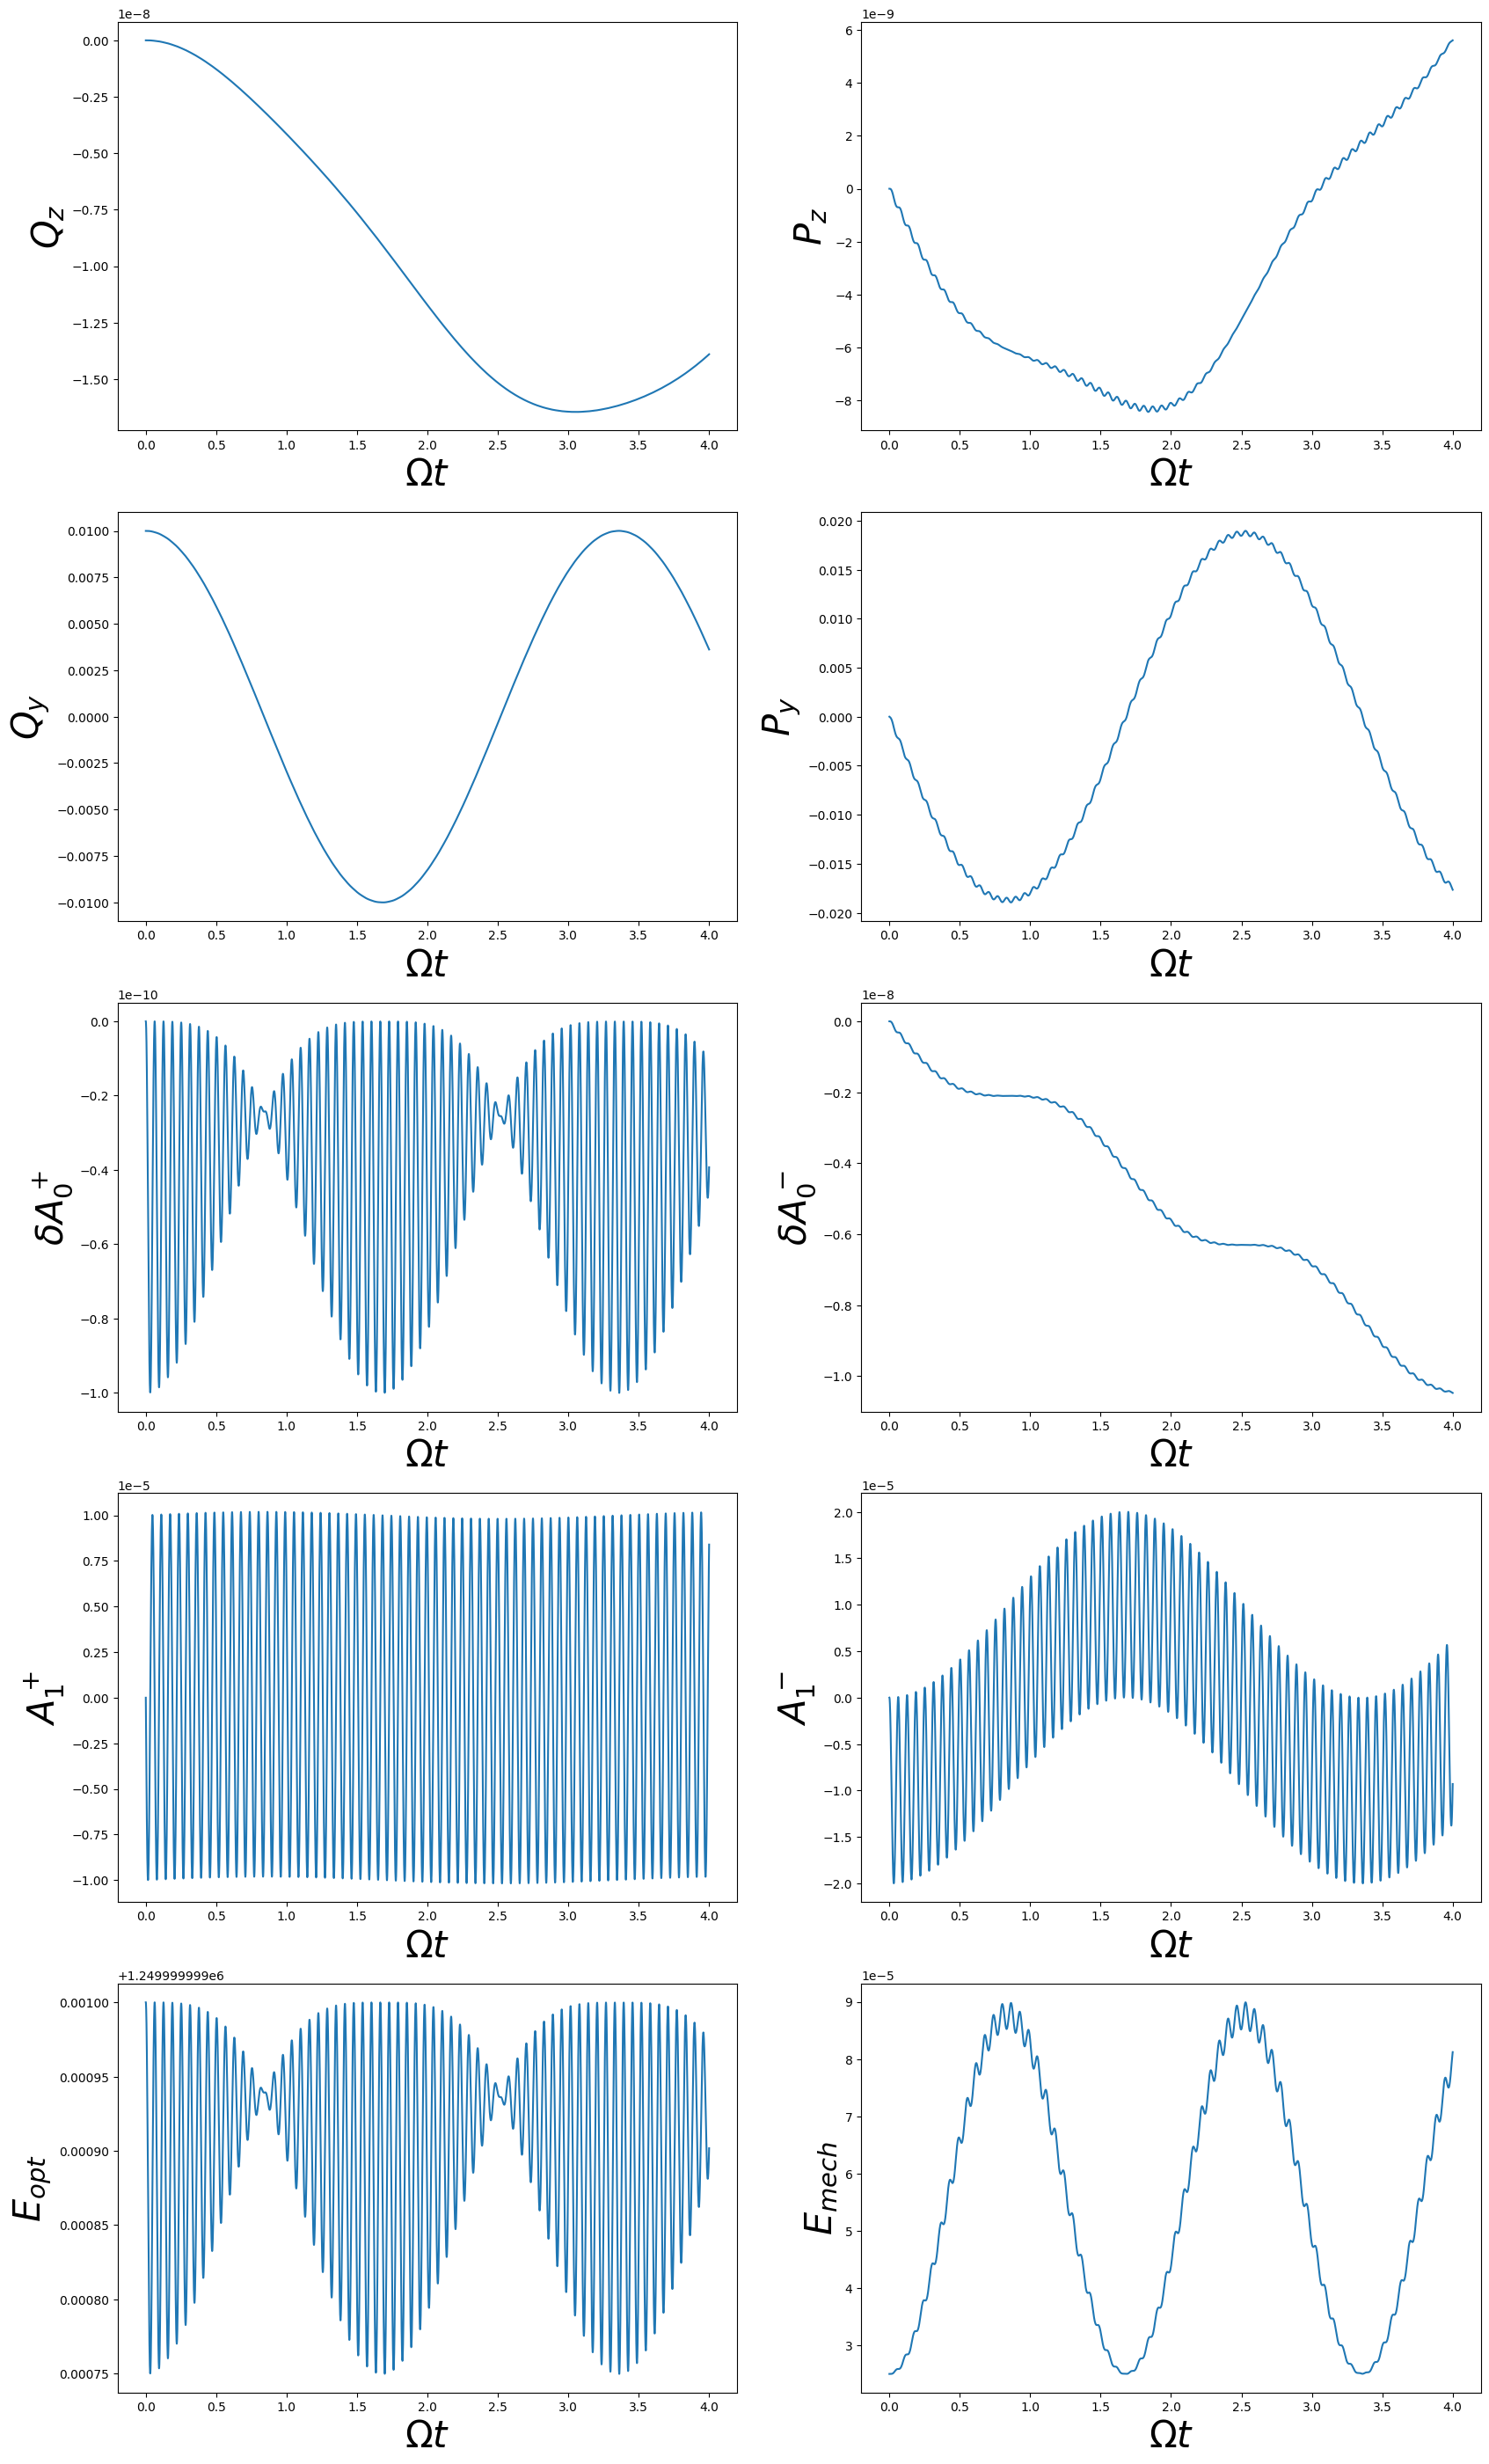

In [178]:
tf=4e0
P_c=0.1 ############### CRITICAL parameter
g_y=1e-1
N0=(P_c*del_omega)**3/(8*g_y**2)
print("N0=",N0)

title='$g_y={0}\Omega  \: ; \: N_0={1} \: ; \: P_c={2}$'.format(g_y,N0,P_c)
file="real_stable_P_c={0}_g_y={1}_tf={2}".format(P_c,g_y,tf)


fig, axs = plt.subplots(5, 2,figsize=(20,35))
data = np.load(folder+file+".npz")
sol=data['sol']
t=data['t']
label_list=data['label']

for i in range(10):
    axs[i//2,i%2].plot(t,sol[i])
    axs[i//2,i%2].set_ylabel(label_list[i],fontsize=30)
    axs[i//2,i%2].set_xlabel('$\Omega  t$',fontsize=30)
#     axs[i//2,i%2].legend(fontsize=12)
# fig.suptitle("$\\lambda={0} \: ; \:  \\nu={1} \: ; \: P_c={2}$".format(np.round(lam,2),np.round(nu,2),P_c),fontsize=30)
plt.show() 

N0= [12500.]


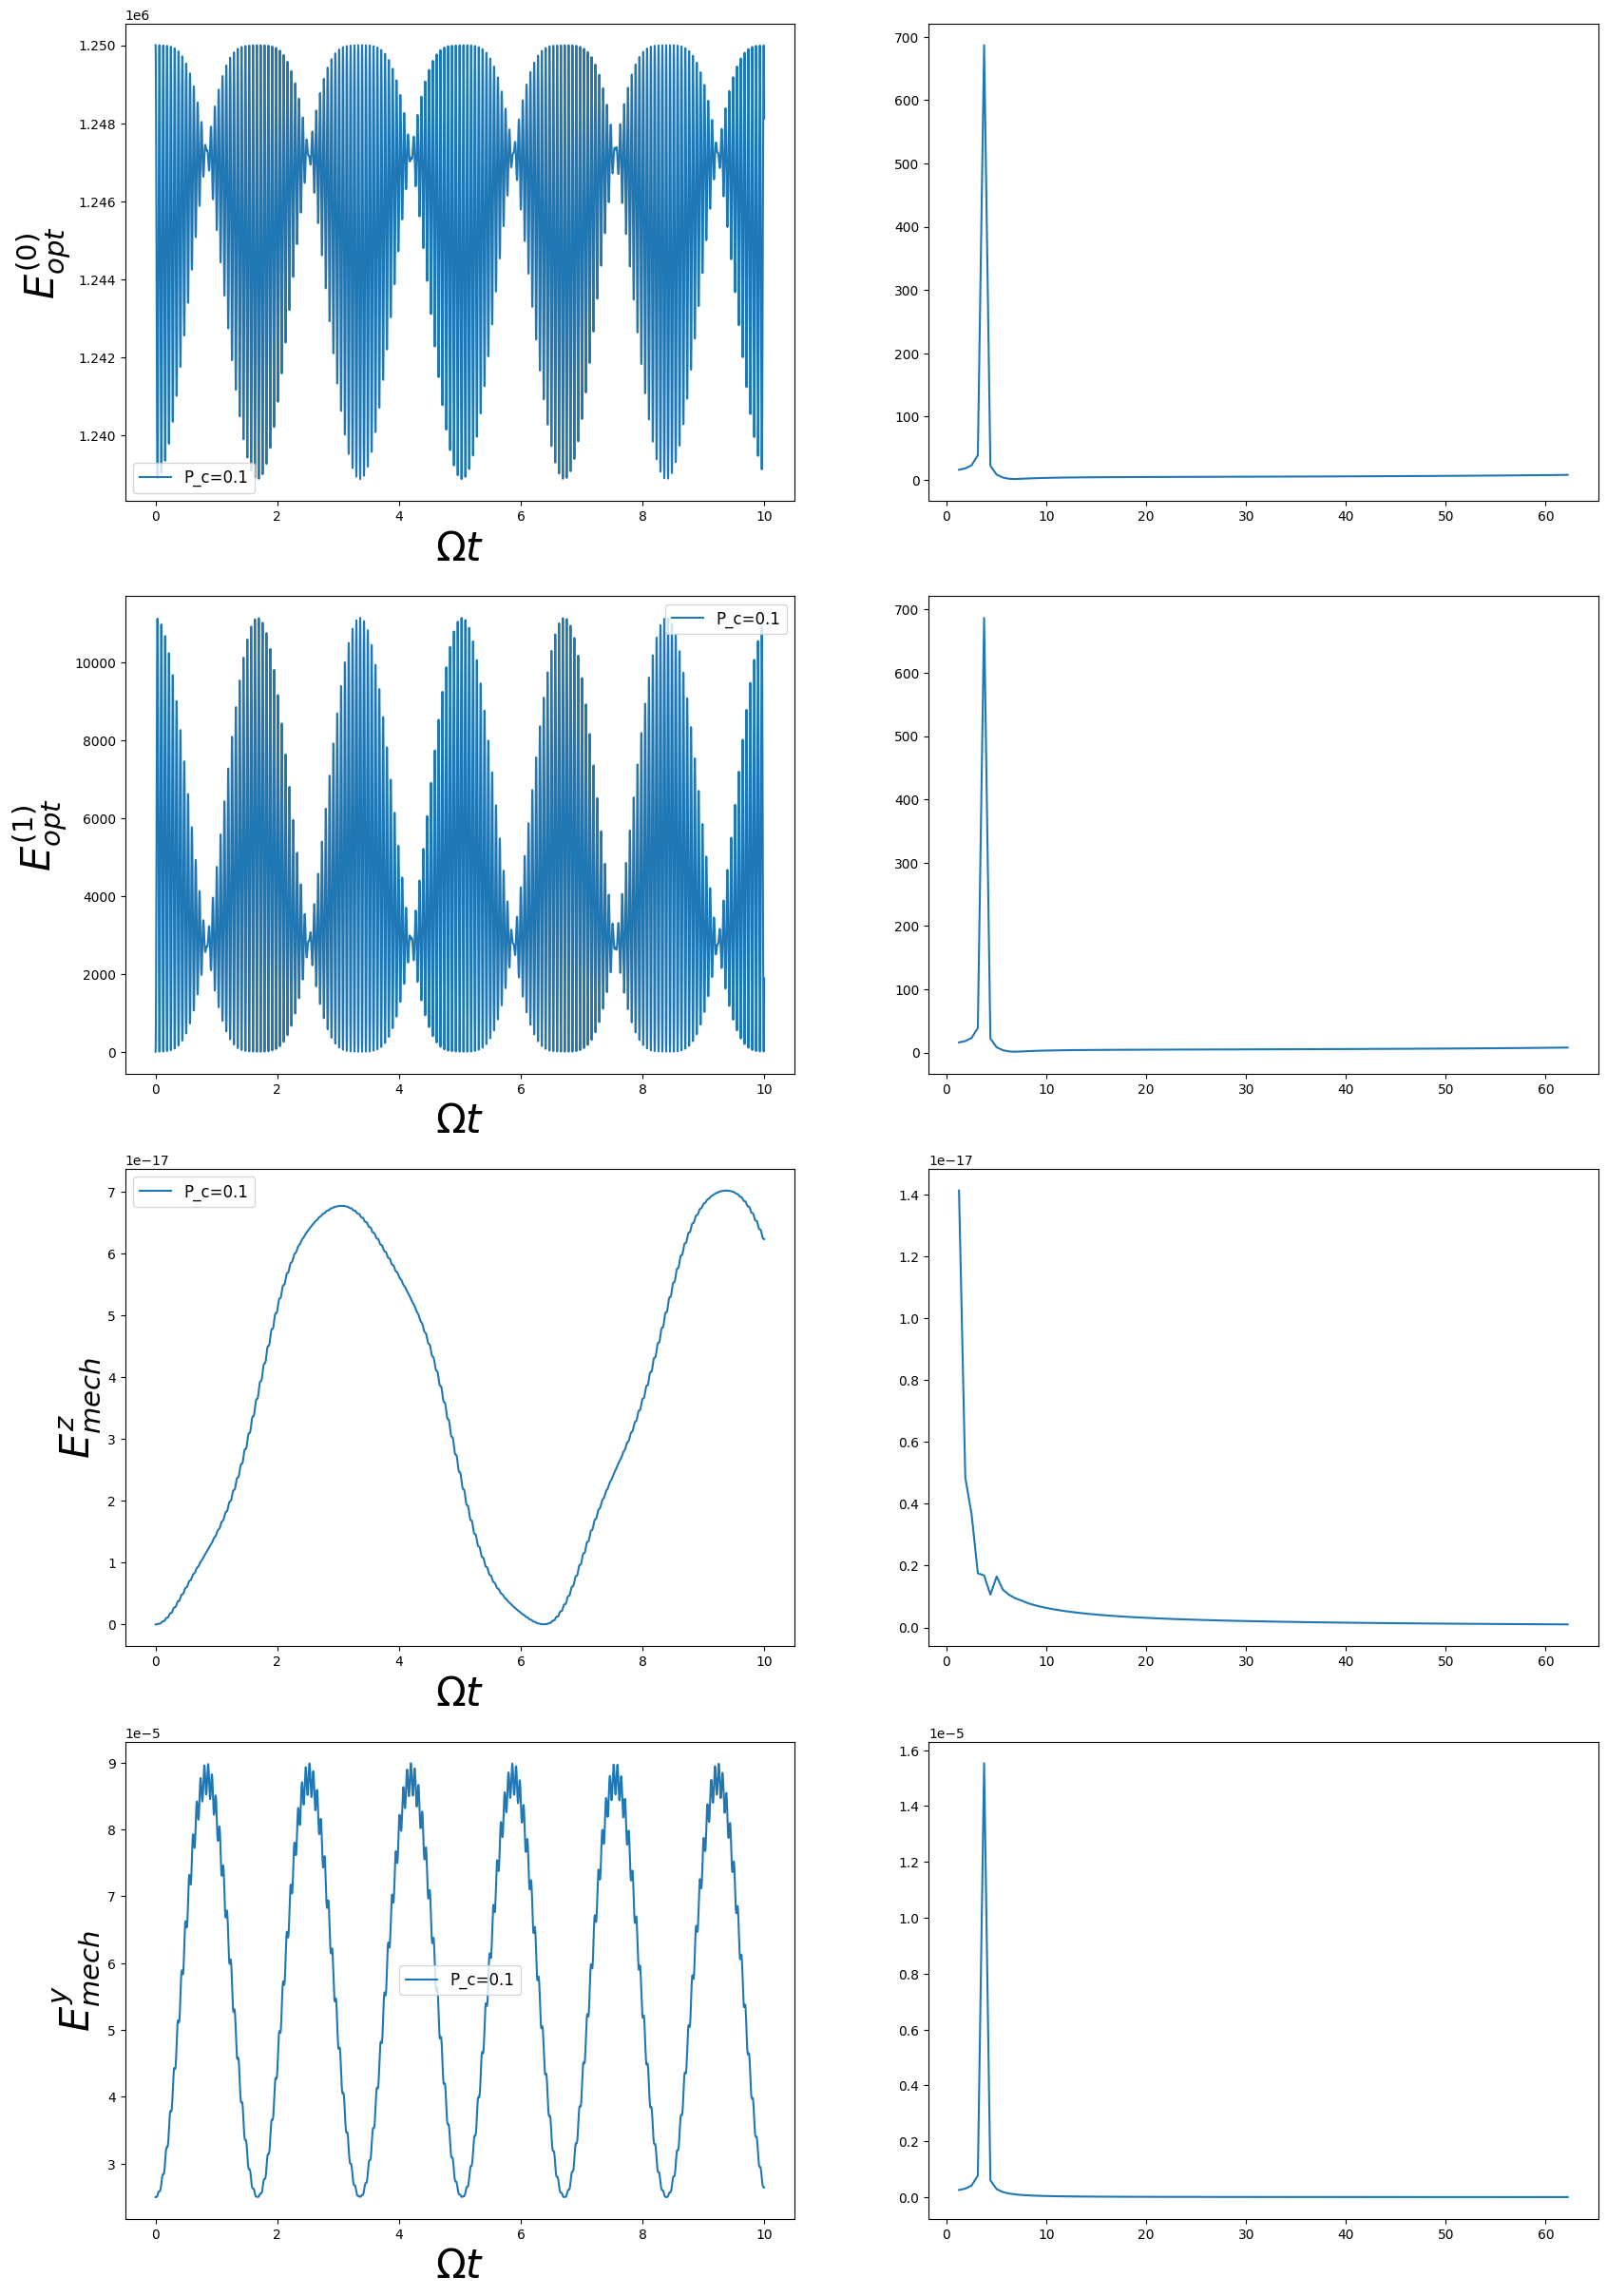

In [181]:
tf=1e1
omega_list=2*np.pi*np.arange(350)/tf

P_c_list=[0.1] ############### CRITICAL parameter
g_y=1e-1
N0_list=(np.array(P_c_list)*del_omega)**3/(8*g_y**2)
print("N0=",N0_list)
title='$g_y={0}\Omega  \: ; \: N_0={1} \: ; \: P_c={2}$'.format(g_y,N0,P_c)
fig, axs = plt.subplots(4, 2,figsize=(20,30))

sf,ef=2,100
for k,P_c in enumerate(P_c_list):
    file="real_stable_P_c={0}_g_y={1}_tf={2}_sep_energy".format(P_c,g_y,tf)
    data = np.load(folder+file+".npz")
    sol=data['sol']
    t=data['t']
    g_z1,g_y,del_omega,N0=data['param']
    N_step=len(t)

    E=[sol[8],sol[9],sol[10],sol[11]]
    label_list=["$E_{opt}^{(0)}$","$E_{opt}^{(1)}$","$E_{mech}^z$","$E_{mech}^y$"]
    omega_list=(2*np.pi*np.arange(L//2+1)/tf)[sf:ef]

    for i in range(4):
        E[i]=(E[i]-0*E[i][0])#/N0
        axs[i,0].plot(t,E[i][:len(t)],label="P_c={0}".format(P_c))
        axs[i,1].plot(omega_list,np.abs(np.fft.rfft(E[i]))[sf:ef]/N_step,label="P_c={0}".format(P_c))


for i in range(4):
    axs[i,0].set_ylabel(label_list[i],fontsize=30)
    axs[i,0].set_xlabel('$\Omega  t$',fontsize=30)
    axs[i,0].legend(fontsize=12)
    axs[i,0].set_ylabel(label_list[i],fontsize=30)
    axs[i,0].set_xlabel('$\Omega  t$',fontsize=30)
    axs[i,0].legend(fontsize=12)

    # fig.suptitle("$\\lambda={0} \: ; \:  \\nu={1} \: ; \: P_c={2}$".format(np.round(lam,2),np.round(nu,2),P_c),fontsize=30)
plt.show() 

N0= 12.499999999999998


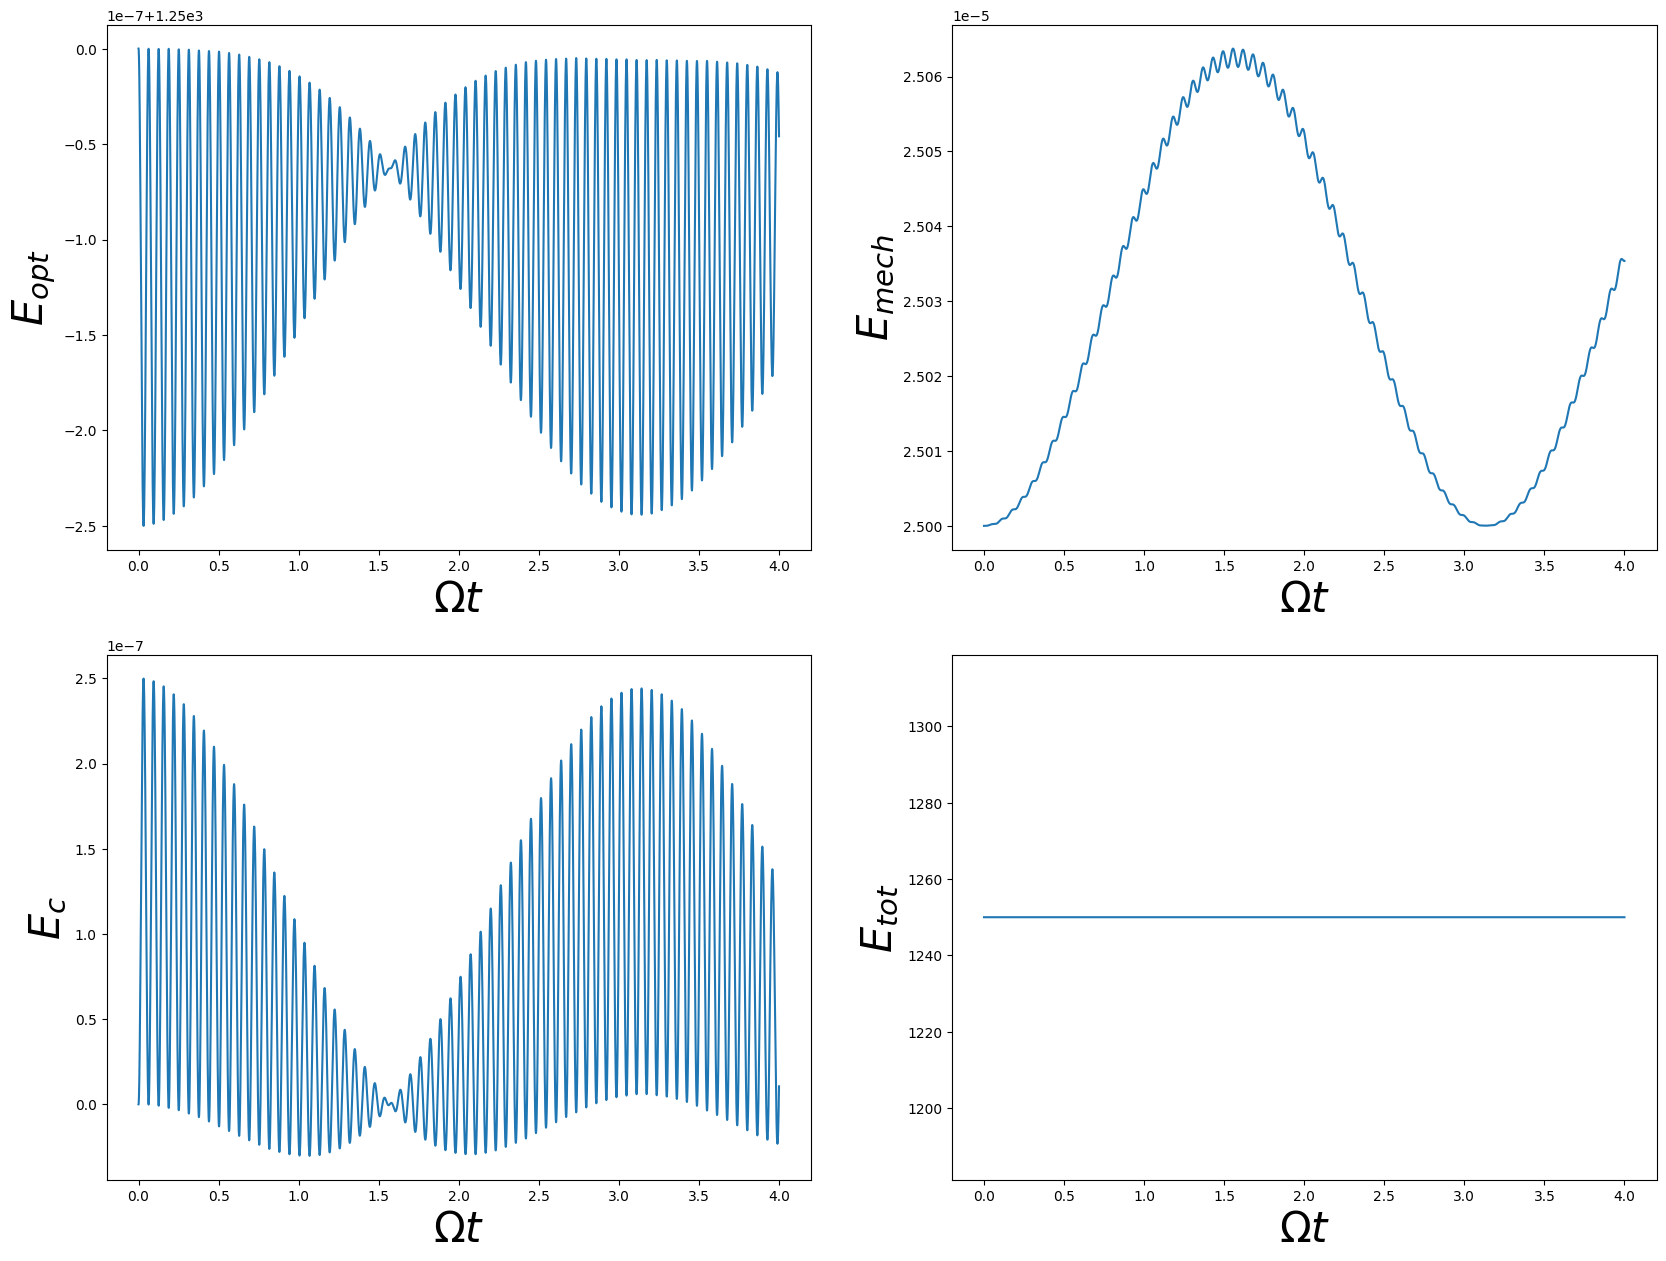

In [65]:
tf=4e0
P_c=0.01 ############### CRITICAL parameter
g_y=1e-1
N0=(P_c*del_omega)**3/(8*g_y**2)
print("N0=",N0)

file="real_stable_P_c={0}_g_y={1}_tf={2}".format(P_c,g_y,tf)


data = np.load(folder+file+".npz")
sol=data['sol']
t=data['t']
l=len(t)
g_z1,g_y,del_omega,N0=data['param']

# q_z,p_z,q_y,p_y,A0_p,A0_m,A1_p,A1_m=sol
# sigma_m=2*(A1_p*A0_m-A1_m*(A0_p+1))
# E_opt=del_omega*((1+A0_p)**2+A0_m**2)+0*N0*omega_1
# E_mech=(q_z**2+q_y**2+p_y**2+p_z**2)/4
# E_c=q_z*N0*g_z1*(A1_p**2+A1_m**2)/2+g_y*q_y*sigma_m/2
E_opt=sol[8]
E_mech=sol[9]
E_c=sol[10]


E_tot=E_opt+E_mech+E_c
E=[E_opt,E_mech,E_c,E_tot]
title='$g_y={0}\Omega  \: ; \: N_0={1} \: ; \: P_c={2}$'.format(g_y,N0,P_c)
label_list=["$E_{opt}$","$E_{mech}$","$E_{c}$","$E_{tot}$"]
fig, axs = plt.subplots(2, 2,figsize=(20,15))

for i in range(4):
    axs[i//2,i%2].plot(t,E[i])
    axs[i//2,i%2].set_ylabel(label_list[i],fontsize=30)
    axs[i//2,i%2].set_xlabel('$\Omega  t$',fontsize=30)
#     axs[i//2,i%2].legend(fontsize=12)
# fig.suptitle("$\\lambda={0} \: ; \:  \\nu={1} \: ; \: P_c={2}$".format(np.round(lam,2),np.round(nu,2),P_c),fontsize=30)
plt.show() 

N0= [16637500. 21600000.]


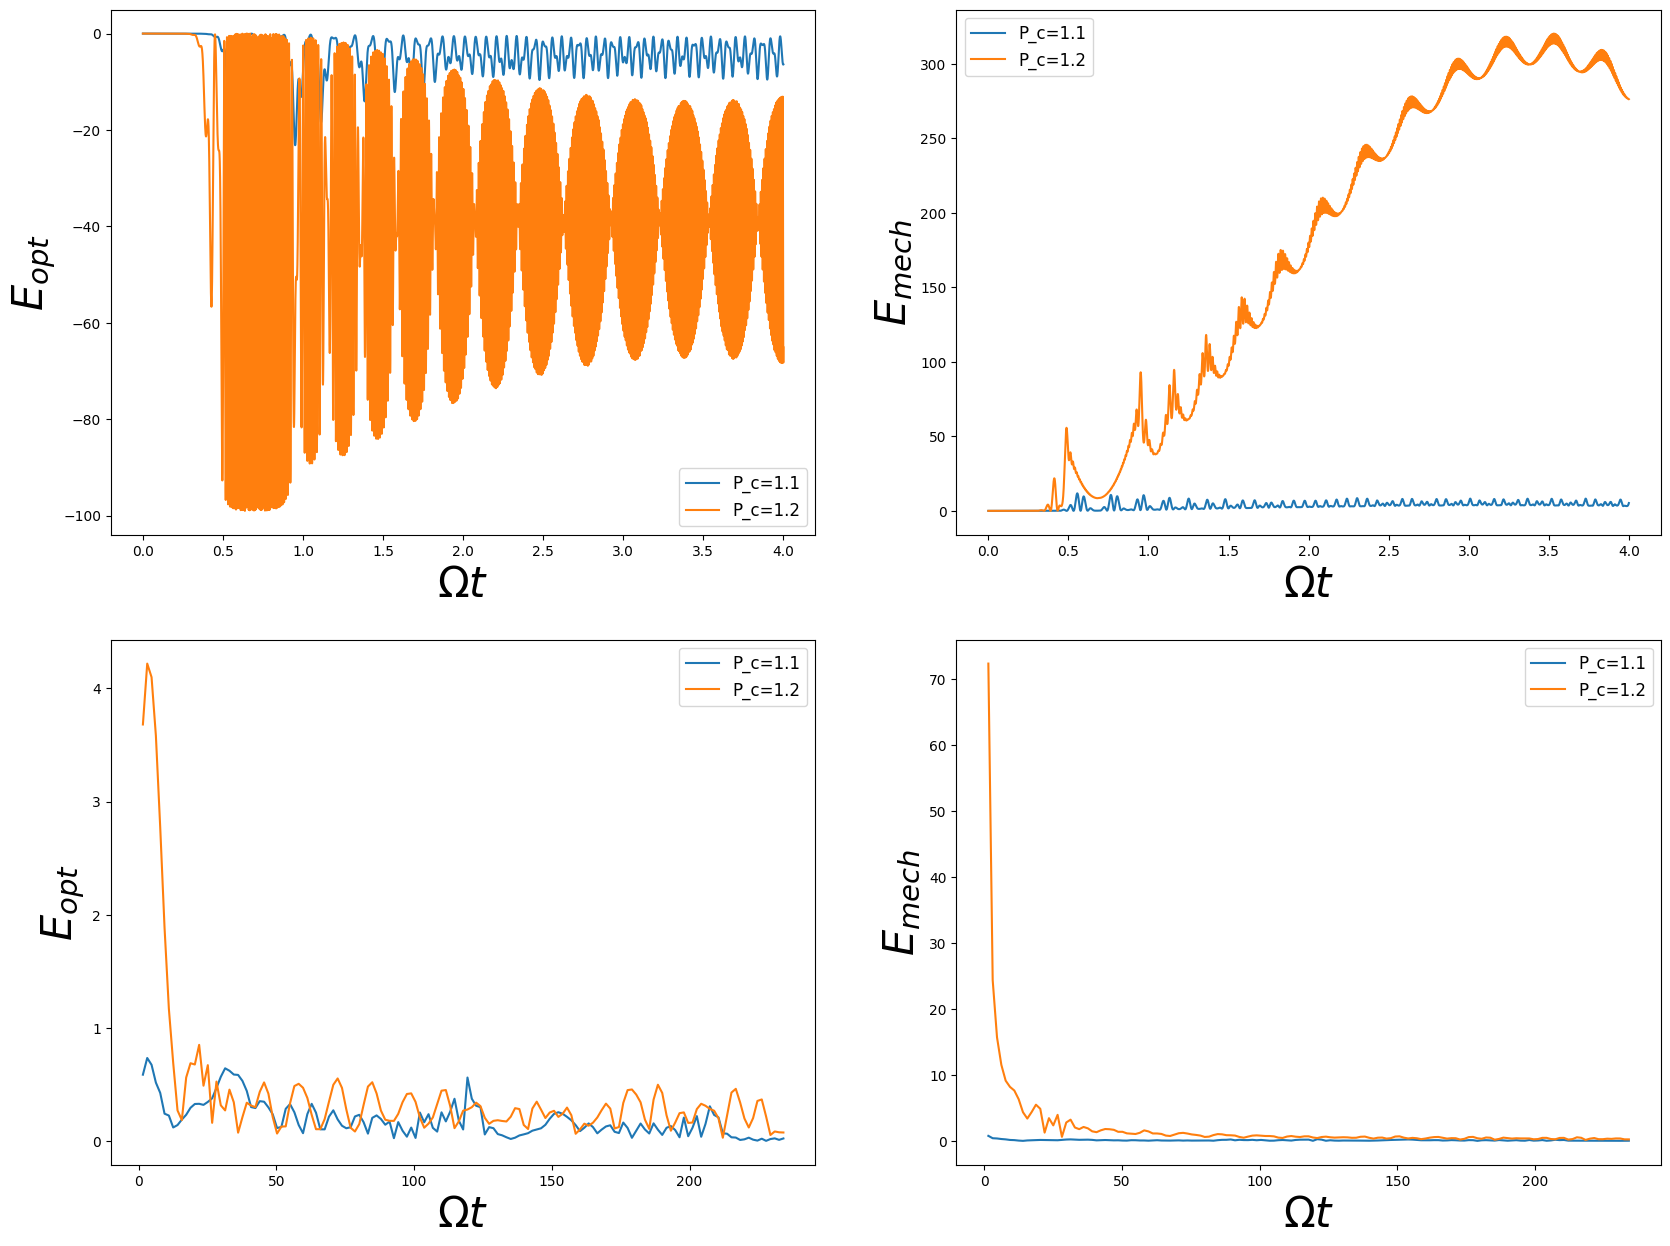

In [319]:
tf=4e0
omega_list=2*np.pi*np.arange(350)/tf

P_c_list=[1.1,1.2] ############### CRITICAL parameter
g_y=1e-1
N0_list=(np.array(P_c_list)*del_omega)**3/(8*g_y**2)
print("N0=",N0_list)
title='$g_y={0}\Omega  \: ; \: N_0={1} \: ; \: P_c={2}$'.format(g_y,N0,P_c)
fig, axs = plt.subplots(2, 2,figsize=(20,15))

sf,ef=1,150
for k,P_c in enumerate(P_c_list):
    file="real_stable_P_c={0}_g_y={1}_tf={2}".format(P_c,g_y,tf)
    data = np.load(folder+file+".npz")
    sol=data['sol']
    t=data['t']
    g_z1,g_y,del_omega,N0=data['param']
    N_step=len(t)
    E_opt=(sol[8]-sol[8][0])/N0
    E_mech=(sol[9]-sol[9][0])/N0
    E=[E_opt,E_mech]
    label_list=["$E_{opt}$","$E_{mech}$"]
    omega_list=(2*np.pi*np.arange(L//2+1)/tf)[sf:ef]

    for i in range(2):
        axs[0,i].plot(t,E[i][:len(t)],label="P_c={0}".format(P_c))
        axs[1,i].plot(omega_list,np.abs(np.fft.rfft(E[i]))[sf:ef]/N_step,label="P_c={0}".format(P_c))


for i in range(2):
    axs[0,i].set_ylabel(label_list[i],fontsize=30)
    axs[0,i].set_xlabel('$\Omega  t$',fontsize=30)
    axs[0,i].legend(fontsize=12)
    axs[1,i].set_ylabel(label_list[i],fontsize=30)
    axs[1,i].set_xlabel('$\Omega  t$',fontsize=30)
    axs[1,i].legend(fontsize=12)

    # fig.suptitle("$\\lambda={0} \: ; \:  \\nu={1} \: ; \: P_c={2}$".format(np.round(lam,2),np.round(nu,2),P_c),fontsize=30)
plt.show() 

N0= [  12500.  337500. 1562500.]


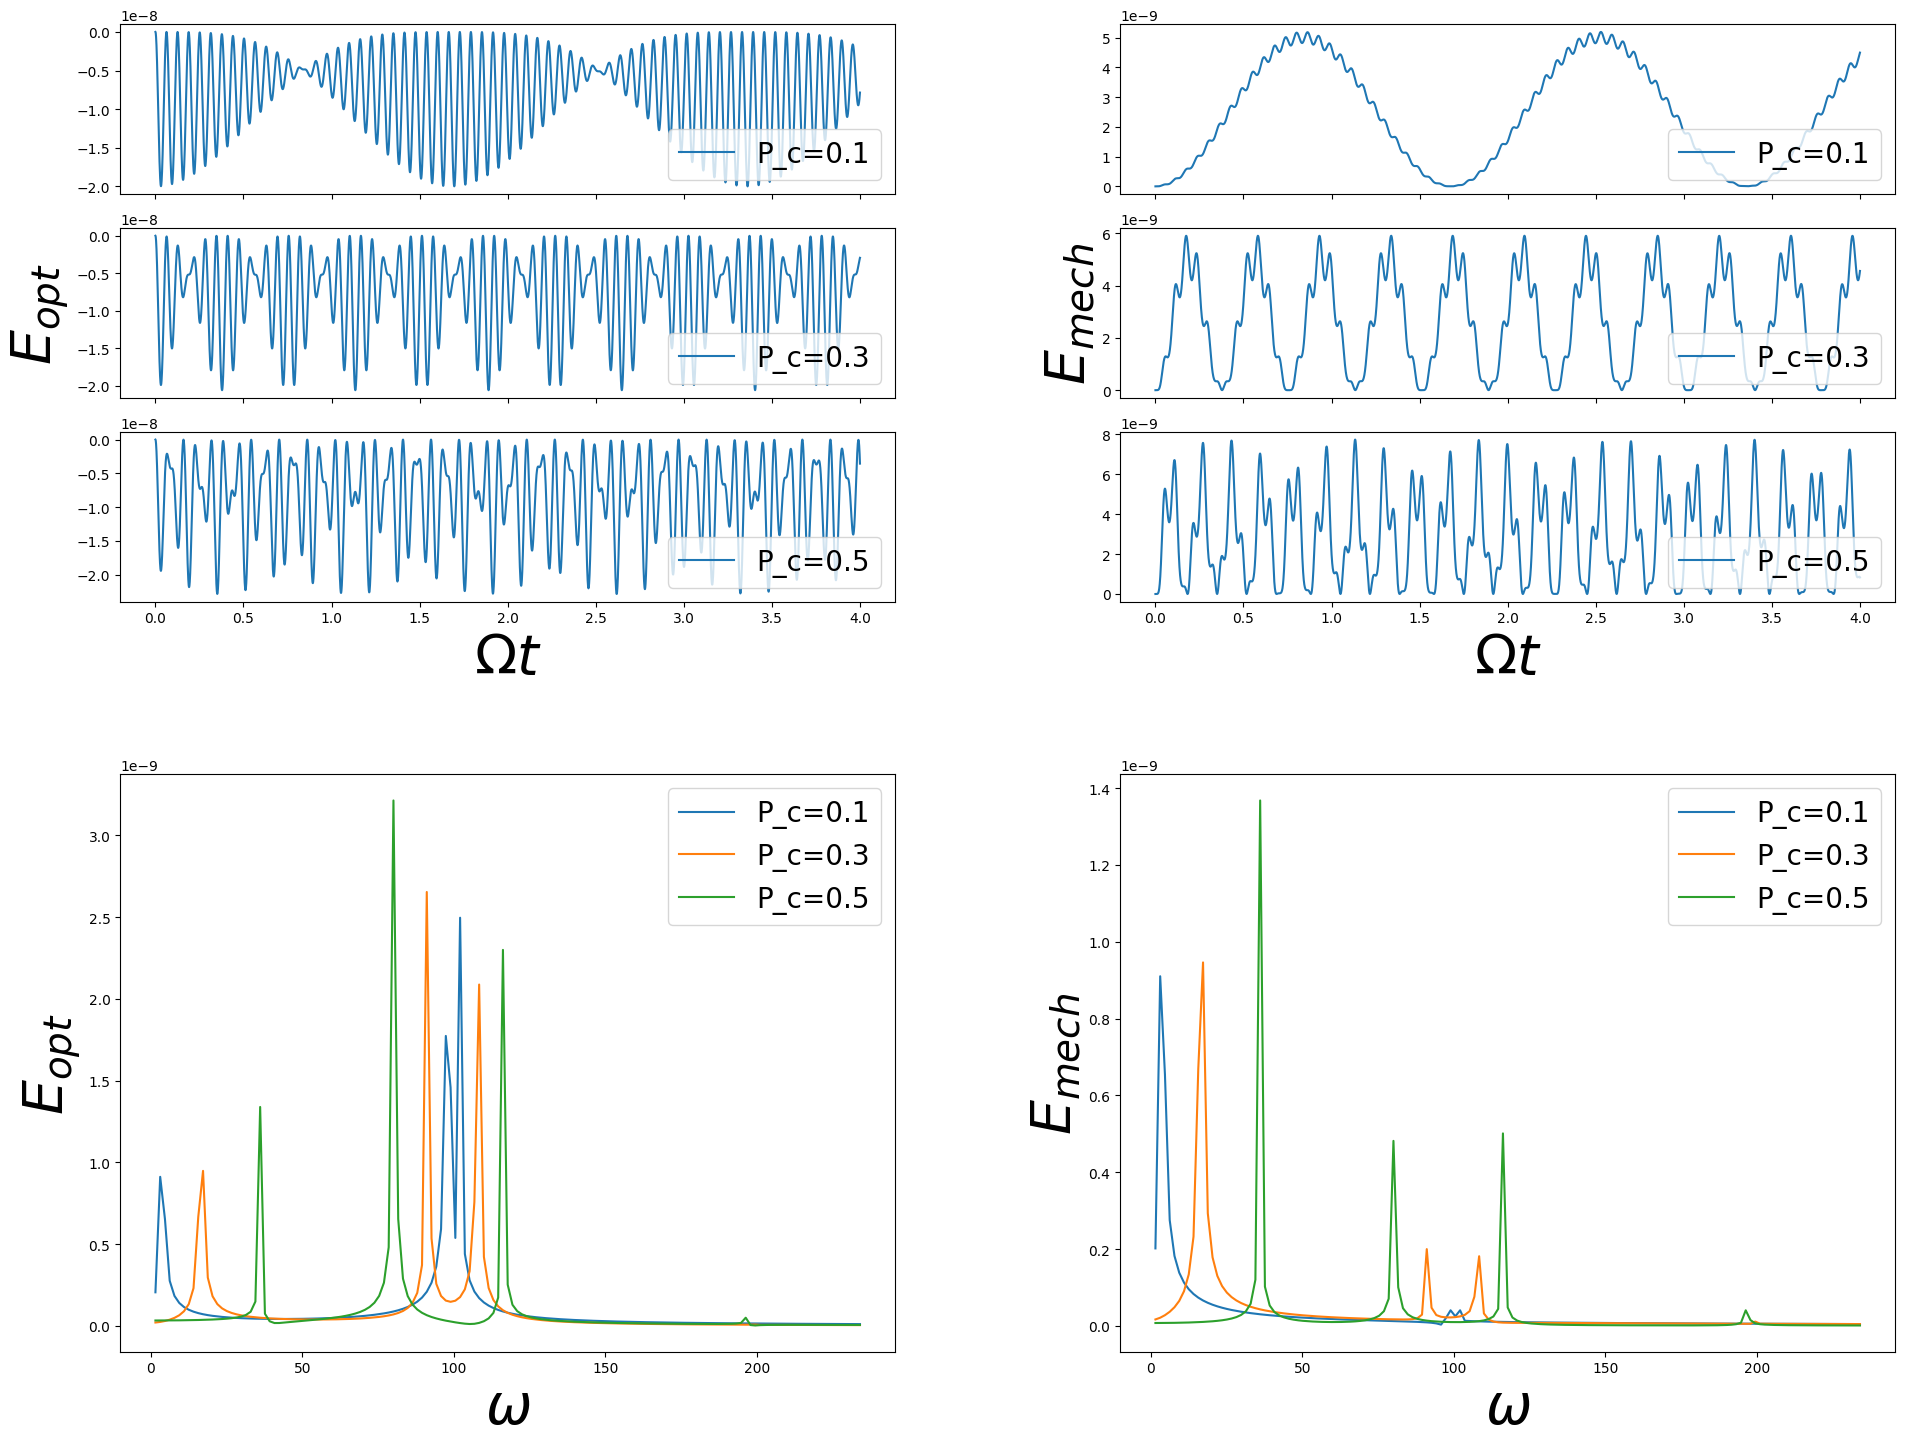

In [274]:
tf=4e0
omega_list=2*np.pi*np.arange(350)/tf

P_c_list=[0.1,0.3,0.5] ############### CRITICAL parameter
g_y=1e-1
N0_list=(np.array(P_c_list)*del_omega)**3/(8*g_y**2)
print("N0=",N0_list)
title='$g_y={0}\Omega  \: ; \: N_0={1} \: ; \: P_c={2}$'.format(g_y,N0,P_c)
fig = plt.figure(figsize=(20,15))

subplots = fig.subfigures(2,2)
sub0=subplots[0][0].subplots(3,1, sharex=True)
sub1=subplots[0][1].subplots(3,1, sharex=True)
sub3=subplots[1][0].subplots(1,1)
sub4=subplots[1][1].subplots(1,1)
label_list=["$E_{opt}$","$E_{mech}$"]

sf,ef=1,150
for k,P_c in enumerate(P_c_list[:3]):
    file="real_stable_P_c={0}_g_y={1}_tf={2}".format(P_c,g_y,tf)
    data = np.load(folder+file+".npz")
    sol=data['sol']
    t=data['t']
    g_z1,g_y,del_omega,N0=data['param']
    N_step=len(t)
    E_opt=(sol[8]-sol[8][0])/N0
    E_mech=(sol[9]-sol[9][0])/N0

    E=[E_opt,E_mech]
    omega_list=(2*np.pi*np.arange(L//2+1)/tf)[sf:ef]
    
    sub0[k].plot(t,E[0][:len(t)],label="P_c={0}".format(P_c))
    sub1[k].plot(t,E[1][:len(t)],label="P_c={0}".format(P_c))
        
    sub3.plot(omega_list,np.abs(np.fft.rfft(E[0]))[sf:ef]/N_step,label="P_c={0}".format(P_c))
    sub4.plot(omega_list,np.abs(np.fft.rfft(E[1]))[sf:ef]/N_step,label="P_c={0}".format(P_c))


for i in range(3):
    sub0[i].legend(fontsize=20,loc='lower right')
    sub1[i].legend(fontsize=20,loc='lower right')
    
sub0[1].set_ylabel(label_list[0],fontsize=40)
sub1[1].set_ylabel(label_list[1],fontsize=40)

sub0[2].set_xlabel('$\Omega  t$',fontsize=40)
sub1[2].set_xlabel('$\Omega  t$',fontsize=40)

sub3.set_ylabel(label_list[0],fontsize=40)
sub3.set_xlabel("$\omega$",fontsize=40)
sub3.legend(fontsize=20,loc="best")
sub4.set_ylabel(label_list[1],fontsize=40)
sub4.set_xlabel("$\omega$",fontsize=40)
sub4.legend(fontsize=20,loc="best")

# fig.suptitle("Stable oscillations around the equillibrium for $\Delta={0}$".format(del_omega),fontsize=40)
# fig.subplots_adjust(top=0.9) 
# fig.tight_layout()
plt.savefig("energy_stable_g_y={0}.jpeg".format(g_y),dpi=300)
plt.show() 


N0= [16637500. 21600000. 27462500.]


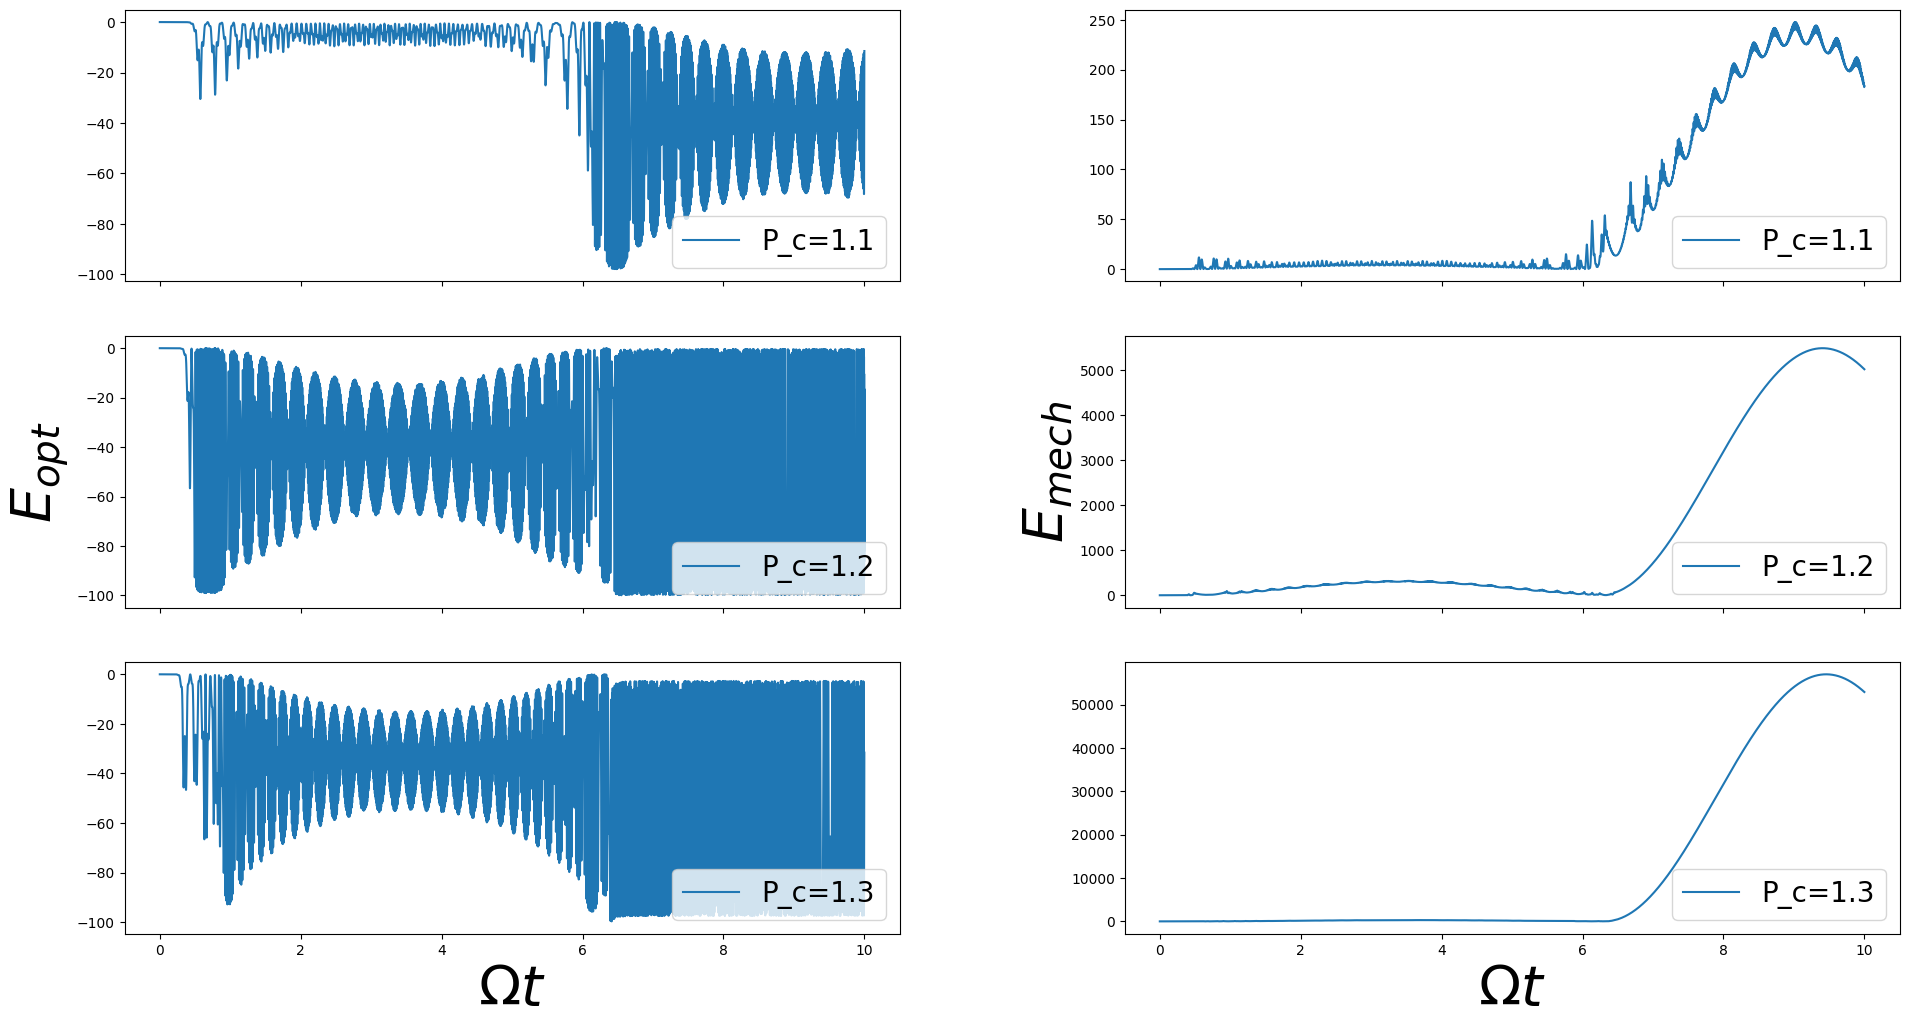

In [322]:
tf=1e1
omega_list=2*np.pi*np.arange(350)/tf

P_c_list=[1.1,1.2,1.3] ############### CRITICAL parameter
g_y=1e-1
N0_list=(np.array(P_c_list)*del_omega)**3/(8*g_y**2)
print("N0=",N0_list)
title='$g_y={0}\Omega  \: ; \: N_0={1} \: ; \: P_c={2}$'.format(g_y,N0,P_c)
fig = plt.figure(figsize=(20,12))

subplots = fig.subfigures(1,2)
sub0=subplots[0].subplots(3,1, sharex=True)
sub1=subplots[1].subplots(3,1, sharex=True)
label_list=["$E_{opt}$","$E_{mech}$"]

sf,ef,stp=1,150,1
for k,P_c in enumerate(P_c_list[:3]):
    file="real_chaotic_P_c={0}_g_y={1}_tf={2}_sep_energy".format(P_c,g_y,tf)
    data = np.load(folder+file+".npz")
    sol=data['sol']
    t=data['t']
    g_z1,g_y,del_omega,N0=data['param']
    N_step=len(t)
    x1=sol[8]+sol[9]
    x2=sol[10]+sol[11]
    E_opt=(x1-x1[0])/N0
    E_mech=(x2-x2[0])/N0

    E=[E_opt,E_mech]
    omega_list=(2*np.pi*np.arange(L//2+1)/tf)[sf:ef]
    
    sub0[k].plot(t[::stp],E[0][::stp],label="P_c={0}".format(P_c))
    sub1[k].plot(t[::stp],E[1][::stp],label="P_c={0}".format(P_c))
        


for i in range(3):
    sub0[i].legend(fontsize=20,loc='lower right')
    sub1[i].legend(fontsize=20,loc='lower right')
    
sub0[1].set_ylabel(label_list[0],fontsize=40)
sub1[1].set_ylabel(label_list[1],fontsize=40)

sub0[2].set_xlabel('$\Omega  t$',fontsize=40)
sub1[2].set_xlabel('$\Omega  t$',fontsize=40)


# fig.suptitle("Stable oscillations around the equillibrium for $\Delta={0}$".format(del_omega),fontsize=40)
# fig.subplots_adjust(top=0.9) 
# fig.tight_layout()
# plt.savefig("energy_chaotic_g_y={0}.jpeg".format(g_y),dpi=300)
plt.show() 


6 5 41 20


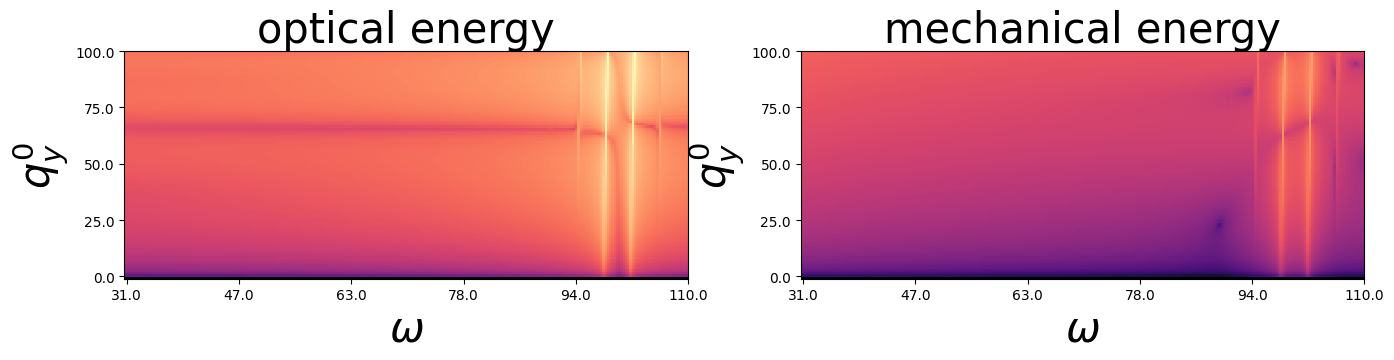

In [17]:
g_y=1e-1
tf=2e1
N_step=10000
qy_0=1e-2
N_grid=101
qy_0_list=np.linspace(0,1,N_grid)*10**2

P_c=0.1
if P_c<=1:
    tt="stable"
else:
    tt="chaotic"
N0=(P_c*del_omega)**3/(8*g_y**2)
param_list=[g_z1,g_y,del_omega,N0]   ##g_z0,g_z1,g_y,ohm, omega_0, omega_1, del_omega, N_eq

label_list=["$Q_z$","$P_z$","$Q_y$","$P_y$","$\delta A_0^+$","$\delta A_0^-$","$A_1^+$","$A_1^-$","$E_{opt}^{(0)}$","$E_{opt}^{(1)}$","$E_{mech}_z$","$E_{mech}_y$","$E_{c}$"]


sf,ef,stp=100,350,1
omega_list=(2*np.pi*np.arange(N_step//2+1)/tf)[sf:ef:stp]

E_mech_mat=np.zeros((len(qy_0_list),(ef-sf)//stp))
E_opt_mat=np.zeros((len(qy_0_list),(ef-sf)//stp))

for k,qy_0 in enumerate(qy_0_list):
    file="real_"+tt+"_P_c={0}_g_y={1}_tf={2}_qy_0={3}".format(np.round(P_c,4),g_y,tf,np.round(qy_0,4))
    data = np.load(folder+file+".npz")
    sol=data['sol']
    t=data['t']
    g_z1,g_y,del_omega,N0=data['param']
    N_step=len(t)
    x1=sol[8]+sol[9]
    x2=sol[10]+sol[11]
    E_opt=(x1-x1[0])/N0
    E_mech=(x2-x2[0])/N0

    label_list=["$E_{opt}$","$E_{mech}$"]
    E_opt_mat[k]=np.log(np.abs(np.fft.rfft(E_opt))[sf:ef:stp]/N_step+10**-10)
    E_mech_mat[k]=np.log(np.abs(np.fft.rfft(E_mech))[sf:ef:stp]/N_step+10**-10)
    
E_fft=[E_opt_mat,E_mech_mat]

title='$g_y={0}\Omega  \: ; \: N_0={1} \: ; \: P_c={2}$'.format(g_y,N0,P_c)
fig, axs = plt.subplots(1, 2,figsize=(16,8))

# find minimum of minima & maximum of maxima
minmin = np.min([np.min(E_mech_mat), np.min(E_opt_mat)])
maxmax = np.max([np.max(E_mech_mat), np.max(E_opt_mat)])
im1=axs[0].imshow(E_opt_mat,vmin=minmin,vmax=maxmax,cmap='magma',origin='lower',interpolation='none')
im2=axs[1].imshow(E_mech_mat,vmin=minmin,vmax=maxmax,cmap='magma',origin='lower',interpolation='none')
axs[0].set_title("optical energy",fontsize=30)
axs[1].set_title("mechanical energy",fontsize=30)
ly=E_fft[0].shape[0]//20
lx=E_fft[0].shape[1]//40
print(lx,ly,(ef-sf)//lx,(N_grid-1)//ly )
# print(len(omega_list[::(ef-sf)//lx]),len(P_c[::(N_grid-1)//ly]))
for i in range(2):
    axs[i].set_ylabel("$q_y^0$",fontsize=30)
    axs[i].set_xlabel('$\omega$',fontsize=30)
    axs[i].set_xticks(np.linspace(0,E_fft[i].shape[1]-1,lx) + 0.5, minor=False)
    axs[i].set_yticks(np.linspace(0,E_fft[i].shape[0]-1,ly) + 0.5, minor=False)
    axs[i].set_xticklabels(np.round(np.linspace(omega_list[0],omega_list[-1],lx),0), minor=False)
    axs[i].set_yticklabels(np.round(np.linspace(qy_0_list[0],qy_0_list[-1],ly),1), minor=False)

# fig.subplots_adjust(right=0.75)
# cbar_ax = fig.add_axes([0.78, 0.15, 0.04, 0.7])
# cbar=fig.colorbar(im1, cax=cbar_ax)
# cbar.set_label("$ln(\mathcal{F}[(E-E_0)/N_0)]$",fontsize=30,rotation=90)
# fig.suptitle("$\\lambda={0} \: ; \:  \\nu={1} \: ; \: P_c={2}$".format(np.round(lam,2),np.round(nu,2),P_c),fontsize=30)



plt.show() 

12 5 41 20


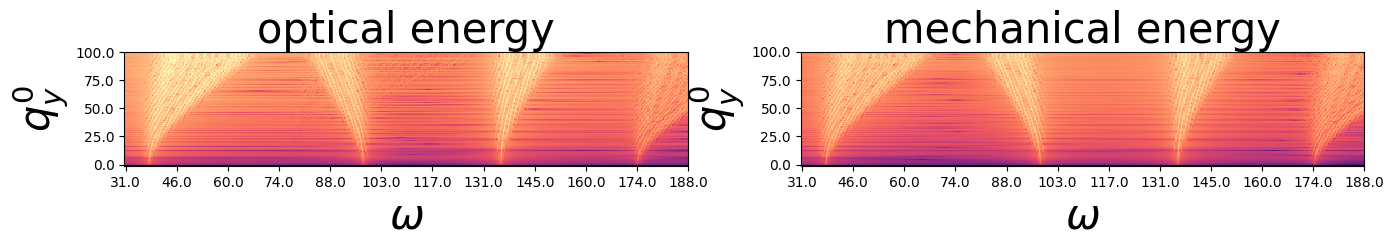

In [23]:
g_y=1e-1
tf=2e1
N_step=10000
N_grid=101
qy_0_list=np.linspace(0,1,N_grid)*10**2

P_c=0.9
if P_c<=1:
    tt="stable"
else:
    tt="chaotic"
N0=(P_c*del_omega)**3/(8*g_y**2)
param_list=[g_z1,g_y,del_omega,N0]   ##g_z0,g_z1,g_y,ohm, omega_0, omega_1, del_omega, N_eq

label_list=["$Q_z$","$P_z$","$Q_y$","$P_y$","$\delta A_0^+$","$\delta A_0^-$","$A_1^+$","$A_1^-$","$E_{opt}^{(0)}$","$E_{opt}^{(1)}$","$E_{mech}_z$","$E_{mech}_y$","$E_{c}$"]


sf,ef,stp=100,600,1
omega_list=(2*np.pi*np.arange(N_step//2+1)/tf)[sf:ef:stp]

E_mech_mat=np.zeros((len(qy_0_list),(ef-sf)//stp))
E_opt_mat=np.zeros((len(qy_0_list),(ef-sf)//stp))

for k,qy_0 in enumerate(qy_0_list):
    file="real_"+tt+"_P_c={0}_g_y={1}_tf={2}_qy_0={3}".format(np.round(P_c,4),g_y,tf,np.round(qy_0,4))
    data = np.load(folder+file+".npz")
    sol=data['sol']
    t=data['t']
    g_z1,g_y,del_omega,N0=data['param']
    N_step=len(t)
    x1=sol[8]+sol[9]
    x2=sol[10]+sol[11]
    E_opt=(x1-x1[0])/N0
    E_mech=(x2-x2[0])/N0

    label_list=["$E_{opt}$","$E_{mech}$"]
    E_opt_mat[k]=np.log(np.abs(np.fft.rfft(E_opt))[sf:ef:stp]/N_step+10**-10)
    E_mech_mat[k]=np.log(np.abs(np.fft.rfft(E_mech))[sf:ef:stp]/N_step+10**-10)
    
E_fft=[E_opt_mat,E_mech_mat]

title='$g_y={0}\Omega  \: ; \: N_0={1} \: ; \: P_c={2}$'.format(g_y,N0,P_c)
fig, axs = plt.subplots(1, 2,figsize=(16,8))

# find minimum of minima & maximum of maxima
minmin = np.min([np.min(E_mech_mat), np.min(E_opt_mat)])
maxmax = np.max([np.max(E_mech_mat), np.max(E_opt_mat)])
im1=axs[0].imshow(E_opt_mat,vmin=minmin,vmax=maxmax,cmap='magma',origin='lower',interpolation='none')
im2=axs[1].imshow(E_mech_mat,vmin=minmin,vmax=maxmax,cmap='magma',origin='lower',interpolation='none')
axs[0].set_title("optical energy",fontsize=30)
axs[1].set_title("mechanical energy",fontsize=30)
ly=E_fft[0].shape[0]//20
lx=E_fft[0].shape[1]//40
print(lx,ly,(ef-sf)//lx,(N_grid-1)//ly )
# print(len(omega_list[::(ef-sf)//lx]),len(P_c[::(N_grid-1)//ly]))
for i in range(2):
    axs[i].set_ylabel("$q_y^0$",fontsize=30)
    axs[i].set_xlabel('$\omega$',fontsize=30)
    axs[i].set_xticks(np.linspace(0,E_fft[i].shape[1]-1,lx) + 0.5, minor=False)
    axs[i].set_yticks(np.linspace(0,E_fft[i].shape[0]-1,ly) + 0.5, minor=False)
    axs[i].set_xticklabels(np.round(np.linspace(omega_list[0],omega_list[-1],lx),0), minor=False)
    axs[i].set_yticklabels(np.round(np.linspace(qy_0_list[0],qy_0_list[-1],ly),1), minor=False)

# fig.subplots_adjust(right=0.75)
# cbar_ax = fig.add_axes([0.78, 0.15, 0.04, 0.7])
# cbar=fig.colorbar(im1, cax=cbar_ax)
# cbar.set_label("$ln(\mathcal{F}[(E-E_0)/N_0)]$",fontsize=30,rotation=90)
# fig.suptitle("$\\lambda={0} \: ; \:  \\nu={1} \: ; \: P_c={2}$".format(np.round(lam,2),np.round(nu,2),P_c),fontsize=30)



plt.show() 

In [49]:
import subprocess
import glob
import ffmpeg

In [47]:
omega_list=(2*np.pi*np.arange(1000//2+1)/tf)
omega_list[-1]
subprocess.call

314.15926535897927

5 5 40 20


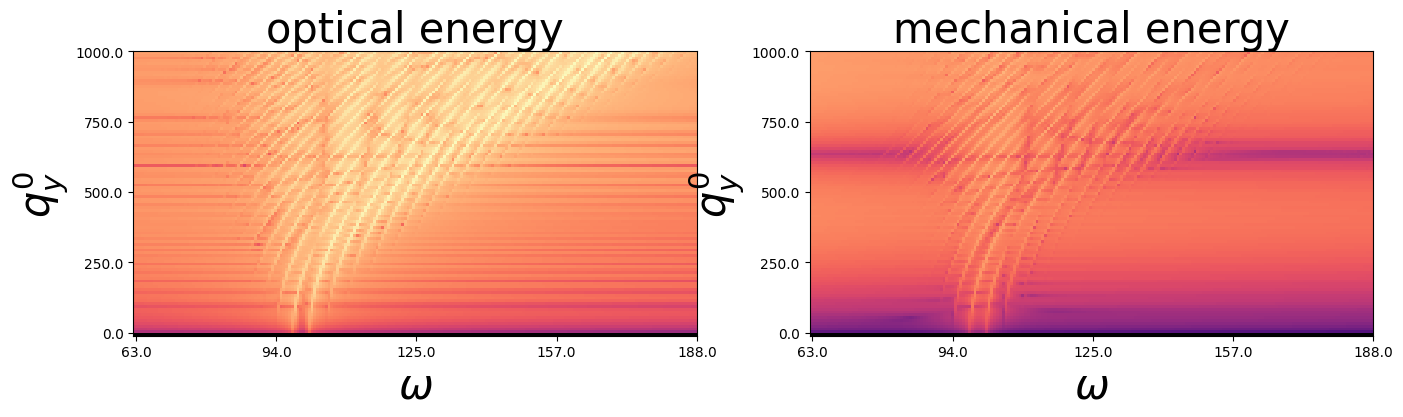

In [26]:
g_y=1e-1
tf=1e1
N_step=10000
N_grid=101
qy_0_list=np.linspace(0,1,N_grid)*10**3

P_c=0.1
if P_c<=1:
    tt="stable"
else:
    tt="chaotic"
N0=(P_c*del_omega)**3/(8*g_y**2)
param_list=[g_z1,g_y,del_omega,N0]   ##g_z0,g_z1,g_y,ohm, omega_0, omega_1, del_omega, N_eq

label_list=["$Q_z$","$P_z$","$Q_y$","$P_y$","$\delta A_0^+$","$\delta A_0^-$","$A_1^+$","$A_1^-$","$E_{opt}^{(0)}$","$E_{opt}^{(1)}$","$E_{mech}_z$","$E_{mech}_y$","$E_{c}$"]


sf,ef,stp=100,300,1
omega_list=(2*np.pi*np.arange(N_step//2+1)/tf)[sf:ef:stp]

E_mech_mat=np.zeros((len(qy_0_list),(ef-sf)//stp))
E_opt_mat=np.zeros((len(qy_0_list),(ef-sf)//stp))

for k,qy_0 in enumerate(qy_0_list):
    file="real_"+tt+"_P_c={0}_g_y={1}_tf={2}_qy_0={3}".format(np.round(P_c,4),g_y,tf,np.round(qy_0,4))
    data = np.load(folder+file+".npz")
    sol=data['sol']
    t=data['t']
    g_z1,g_y,del_omega,N0=data['param']
    N_step=len(t)
    x1=sol[8]+sol[9]
    x2=sol[10]+sol[11]
    E_opt=(x1-x1[0])/N0
    E_mech=(x2-x2[0])/N0

    label_list=["$E_{opt}$","$E_{mech}$"]
    E_opt_mat[k]=np.log(np.abs(np.fft.rfft(E_opt))[sf:ef:stp]/N_step+10**-10)
    E_mech_mat[k]=np.log(np.abs(np.fft.rfft(E_mech))[sf:ef:stp]/N_step+10**-10)
    
E_fft=[E_opt_mat,E_mech_mat]

title='$g_y={0}\Omega  \: ; \: N_0={1} \: ; \: P_c={2}$'.format(g_y,N0,P_c)
fig, axs = plt.subplots(1, 2,figsize=(16,8))

# find minimum of minima & maximum of maxima
minmin = np.min([np.min(E_mech_mat), np.min(E_opt_mat)])
maxmax = np.max([np.max(E_mech_mat), np.max(E_opt_mat)])
im1=axs[0].imshow(E_opt_mat,vmin=minmin,vmax=maxmax,cmap='magma',origin='lower',interpolation='none')
im2=axs[1].imshow(E_mech_mat,vmin=minmin,vmax=maxmax,cmap='magma',origin='lower',interpolation='none')
axs[0].set_title("optical energy",fontsize=30)
axs[1].set_title("mechanical energy",fontsize=30)
ly=E_fft[0].shape[0]//20
lx=E_fft[0].shape[1]//40
print(lx,ly,(ef-sf)//lx,(N_grid-1)//ly )
# print(len(omega_list[::(ef-sf)//lx]),len(P_c[::(N_grid-1)//ly]))
for i in range(2):
    axs[i].set_ylabel("$q_y^0$",fontsize=30)
    axs[i].set_xlabel('$\omega$',fontsize=30)
    axs[i].set_xticks(np.linspace(0,E_fft[i].shape[1]-1,lx) + 0.5, minor=False)
    axs[i].set_yticks(np.linspace(0,E_fft[i].shape[0]-1,ly) + 0.5, minor=False)
    axs[i].set_xticklabels(np.round(np.linspace(omega_list[0],omega_list[-1],lx),0), minor=False)
    axs[i].set_yticklabels(np.round(np.linspace(qy_0_list[0],qy_0_list[-1],ly),1), minor=False)

# fig.subplots_adjust(right=0.75)
# cbar_ax = fig.add_axes([0.78, 0.15, 0.04, 0.7])
# cbar=fig.colorbar(im1, cax=cbar_ax)
# cbar.set_label("$ln(\mathcal{F}[(E-E_0)/N_0)]$",fontsize=30,rotation=90)
# fig.suptitle("$\\lambda={0} \: ; \:  \\nu={1} \: ; \: P_c={2}$".format(np.round(lam,2),np.round(nu,2),P_c),fontsize=30)



plt.show() 

In [ ]:
file_name="real_p_qy_0_varying"
df = pd.read_csv(folder+file_name+'.csv')


data read


KeyError: 'E_opt'

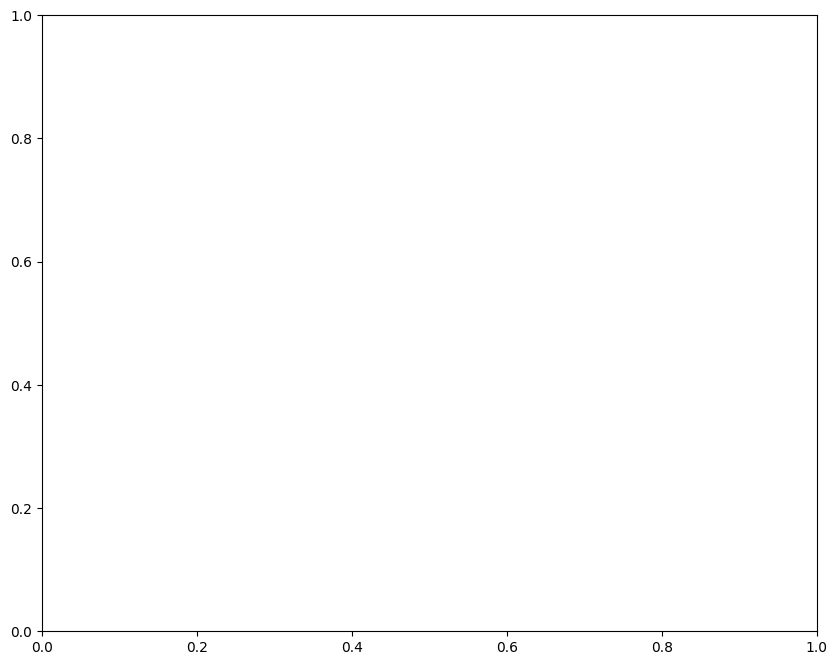

In [57]:
g_y=1e-1
tf=2e1
# file_name="real_stable_zip_gy={0}_tf={1}_p_qy_0_varying".format(g_y,tf)
file_name="real_p_qy_0_varying"
print("data read")
df = pd.read_csv(folder+file_name+'.csv')

N_step=10000
N_grid=10
P_list=np.linspace(1/N_grid,1,N_grid,endpoint=True)
qy_0_list=np.linspace(1/N_grid,1,N_grid,endpoint=True)*10**2

sf,ef,stp=100,300,5
omega_list=(2*np.pi*np.arange(N_step//2+1)/tf)[sf:ef:stp]

E_opt_P=np.zeros((N_grid,(ef-sf)//stp))
E_opt_q0=np.zeros((N_grid,(ef-sf)//stp))
out = cv2.VideoWriter(folder+file,cv2.VideoWriter_fourcc(*'DIVX'), 30, (N_step//(2*stp),N_grid))


for i,qy_0 in enumerate(qy_0_list):
    fig, axs = plt.subplots(1, 1,figsize=(10,8))
    E_opt_P=np.zeros((N_grid,(ef-sf)//stp))
    E1=df.query("qy_0=={0}".format(qy_0))
    for j,P in enumerate(P_list):
        N0=(P*del_omega)**3/(8*g_y**2)
        E2=df.query("P=={0}".format(P))["E_opt"]
        E_opt=(E2-E2[0])/N0
        E_opt_P[j]=np.log(np.abs(np.fft.rfft(E_opt))[sf:ef:stp]/N_step+10**-15)
    im=plt.imshow(E_opt_P,vmin=-30,vmax=-2,cmap='magma',origin='lower',interpolation='none')
    plt.title("$E_{opt}$",fontsize=30)
    
    ly=E_opt_P.shape[0]//20
    lx=E_opt_P.shape[1]//40
    
    plt.ylabel("$P$",fontsize=30)
    plt.xlabel('$\omega$',fontsize=30)
    plt.set_xticks(np.linspace(0,E_fft[i].shape[1]-1,lx) + 0.5, minor=False)
    plt.set_yticks(np.linspace(0,E_fft[i].shape[0]-1,ly) + 0.5, minor=False)
    plt.set_xticklabels(np.round(np.linspace(omega_list[0],omega_list[-1],lx),0), minor=False)
    plt.set_yticklabels(np.round(np.linspace(qy_0_list[0],qy_0_list[-1],ly),1), minor=False)
    
    fig.subplots_adjust(right=0.75)
    cbar_ax = fig.add_axes([0.78, 0.15, 0.04, 0.7])
    cbar=fig.colorbar(im, cax=cbar_ax)
    cbar.set_label("$ln(\mathcal{F}[(E-E_0)/N_0)]$",fontsize=30,rotation=90)
    fig.suptitle("$q_y(0)={0}$".format(np.round(qy_0,2)),fontsize=30)
    plt.savefig(folder+"render_qy_0_{0}.jpeg".format(i),dpi=300)
    
    imS=cv2.imread(folder+"render_qy_0_{0}.jpeg".format(i))
    out.write(imS)
out.release()

In [46]:
filter_df=df.query("P==0.0001 and qy_0==0.01")
filter_df

del_omega      g_z1  g_z0  g_y        N0       P  qy_0       time  \
160        100.0  0.004472   0.0  0.1  0.000013  0.0001  0.01   0.000000   
161        100.0  0.004472   0.0  0.1  0.000013  0.0001  0.01   0.002000   
162        100.0  0.004472   0.0  0.1  0.000013  0.0001  0.01   0.004000   
163        100.0  0.004472   0.0  0.1  0.000013  0.0001  0.01   0.006001   
164        100.0  0.004472   0.0  0.1  0.000013  0.0001  0.01   0.008001   
...          ...       ...   ...  ...       ...     ...   ...        ...   
10155      100.0  0.004472   0.0  0.1  0.000013  0.0001  0.01  19.991999   
10156      100.0  0.004472   0.0  0.1  0.000013  0.0001  0.01  19.993999   
10157      100.0  0.004472   0.0  0.1  0.000013  0.0001  0.01  19.996000   
10158      100.0  0.004472   0.0  0.1  0.000013  0.0001  0.01  19.998000   
10159      100.0  0.004472   0.0  0.1  0.000013  0.0001  0.01  20.000000   

                Q_z           P_z  ...       P_y        d_A0_p        d_A0_m  \
160    0.000000e+00  0.000000e+00  ...  0.000000  0.000000e+00  0.000000e+00   
161   -9.564720e-26 -1.471899e-22  ... -0.000020 -9.959222e-13 -6.582572e-14   
162   -1.177541e-24 -1.182893e-21  ... -0.000040 -3.948118e-12 -5.290056e-13   
163   -6.011405e-24 -3.952114e-21  ... -0.000060 -8.732858e-12 -1.767433e-12   
164   -1.894413e-23 -9.231970e-21  ... -0.000080 -1.515567e-11 -4.128638e-12   
...             ...           ...  ...       ...           ...           ...   
10155 -5.900420e-18 -8.166074e-18  ... -0.009097 -2.089518e-11 -5.091832e-08   
10156 -5.916751e-18 -8.164133e-18  ... -0.009105 -2.331303e-11 -5.091865e-08   
10157 -5.933080e-18 -8.163292e-18  ... -0.009113 -2.594696e-11 -5.091948e-08   
10158 -5.949409e-18 -8.163623e-18  ... -0.009121 -2.868703e-11 -5.092085e-08   
10159 -5.965739e-18 -8.165149e-18  ... -0.009129 -3.142213e-11 -5.092275e-08   

           A1_p          A1_m      Eo_0          Eo_1          Em_z      Em_y  \
160    0.000000  0.000000e+00  0.001250  0.000000e+00  0.000000e+00  0.000025   
161   -0.000002 -1.991846e-07  0.001250  1.107963e-07  4.697070e-44  0.000025   
162   -0.000004 -7.896268e-07  0.001250  4.392281e-07  3.632476e-43  0.000025   
163   -0.000006 -1.746587e-06  0.001249  9.715304e-07  4.010259e-42  0.000025   
164   -0.000007 -3.031181e-06  0.001248  1.686068e-06  2.191633e-41  0.000025   
...         ...           ...       ...           ...           ...       ...   
10155 -0.000005 -2.186983e-07  0.001248  2.324444e-06  2.537524e-35  0.000025   
10156 -0.000006 -1.385490e-06  0.001247  2.593430e-06  2.541556e-35  0.000025   
10157 -0.000007 -2.662140e-06  0.001247  2.886455e-06  2.546050e-35  0.000025   
10158 -0.000007 -3.996107e-06  0.001247  3.191288e-06  2.551036e-35  0.000025   
10159 -0.000007 -5.333577e-06  0.001247  3.495568e-06  2.556523e-35  0.000025   

                 Ec  
160    0.000000e+00  
161    2.489804e-15  
162    9.870256e-15  
163    2.183195e-14  
164    3.788856e-14  
...             ...  
10155  1.135562e-15  
10156  7.162171e-15  
10157  1.370104e-14  
10158  2.047540e-14  
10159  2.720672e-14  

[10000 rows x 21 columns]

2 5 174 19


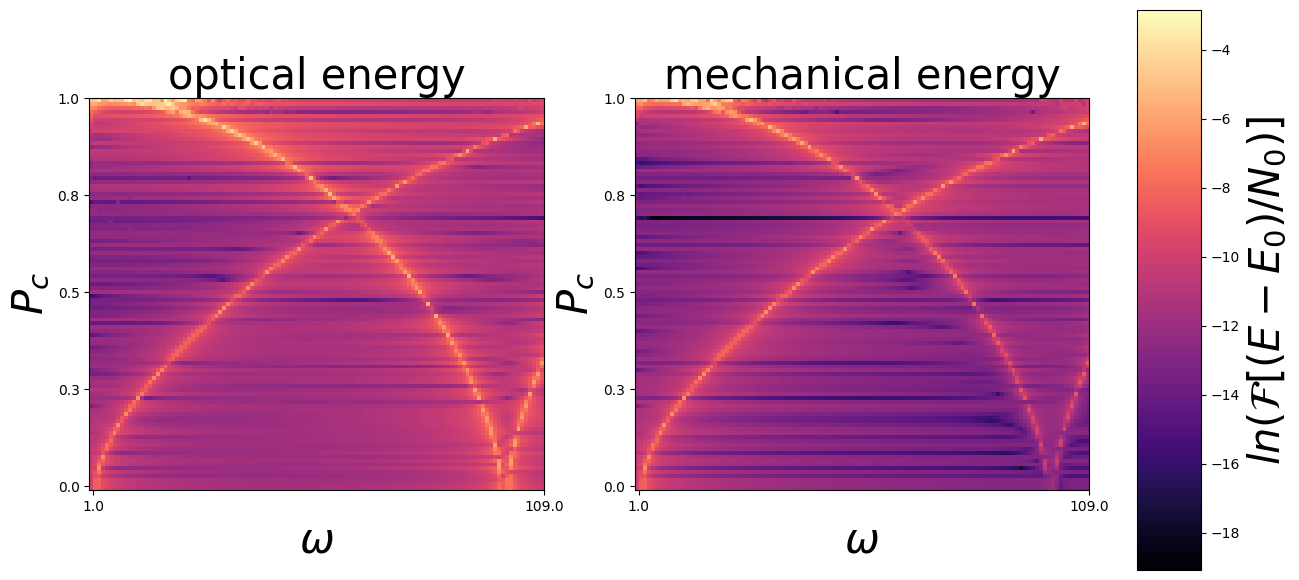

In [19]:
tf=2e1
omega_list=2*np.pi*np.arange(350)/tf
N_step=10000
N_grid=100
P_c_list=np.linspace(0.01,1,N_grid) ############### CRITICAL parameter
g_y=1e-1
qy_0=1e1
N0_list=(np.array(P_c_list)*del_omega)**3/(8*g_y**2)
# print("N0=",N0_list)
title='$g_y={0}\Omega  \: ; \: N_0={1} \: ; \: P_c={2}$'.format(g_y,N0,P_c)
fig, axs = plt.subplots(1, 2,figsize=(16,8))

sf,ef,stp=2,350,3
omega_list=(2*np.pi*np.arange(N_step//2+1)/tf)[sf:ef:stp]

E_mech_mat=np.zeros((len(P_c_list),(ef-sf)//stp))
E_opt_mat=np.zeros((len(P_c_list),(ef-sf)//stp))

for k,P_c in enumerate(P_c_list):
    if P_c<=1:
        tt="stable"
    else:
        tt="chaotic"
    file="real_"+tt+"_P_c={0}_g_y={1}_tf={2}_qy_0={3}".format(np.round(P_c,4),g_y,tf,np.round(qy_0,4))
    data = np.load(folder+file+".npz")
    sol=data['sol']
    t=data['t']
    g_z1,g_y,del_omega,N0=data['param']
    N_step=len(t)
    x1=sol[8]+sol[9]
    x2=sol[10]+sol[11]
    E_opt=(x1-x1[0])/N0
    E_mech=(x2-x2[0])/N0

    label_list=["$E_{opt}$","$E_{mech}$"]
    E_opt_mat[k]=np.log(np.abs(np.fft.rfft(E_opt))[sf:ef:stp]/N_step)
    E_mech_mat[k]=np.log(np.abs(np.fft.rfft(E_mech))[sf:ef:stp]/N_step)
    
E_fft=[E_opt_mat,E_mech_mat]

# find minimum of minima & maximum of maxima
minmin = np.min([np.min(E_mech_mat), np.min(E_opt_mat)])
maxmax = np.max([np.max(E_mech_mat), np.max(E_opt_mat)])
im1=axs[0].imshow(E_opt_mat,vmin=minmin,vmax=maxmax,cmap='magma',origin='lower',interpolation='none')
im2=axs[1].imshow(E_mech_mat,vmin=minmin,vmax=maxmax,cmap='magma',origin='lower',interpolation='none')
axs[0].set_title("optical energy",fontsize=30)
axs[1].set_title("mechanical energy",fontsize=30)
ly=E_fft[0].shape[0]//20
lx=E_fft[0].shape[1]//40
print(lx,ly,(ef-sf)//lx,(N_grid-1)//ly )
# print(len(omega_list[::(ef-sf)//lx]),len(P_c[::(N_grid-1)//ly]))
for i in range(2):
    axs[i].set_ylabel("$P_c$",fontsize=30)
    axs[i].set_xlabel('$\omega$',fontsize=30)
    axs[i].set_xticks(np.linspace(0,E_fft[i].shape[1]-1,lx) + 0.5, minor=False)
    axs[i].set_yticks(np.linspace(0,E_fft[i].shape[0]-1,ly) + 0.5, minor=False)
    axs[i].set_xticklabels(np.round(np.linspace(omega_list[0],omega_list[-1],lx),0), minor=False)
    axs[i].set_yticklabels(np.round(np.linspace(P_c_list[0],P_c_list[-1],ly),1), minor=False)

fig.subplots_adjust(right=0.75)
cbar_ax = fig.add_axes([0.78, 0.15, 0.04, 0.7])
cbar=fig.colorbar(im1, cax=cbar_ax)
cbar.set_label("$ln(\mathcal{F}[(E-E_0)/N_0)]$",fontsize=30,rotation=90)
# fig.suptitle("$\\lambda={0} \: ; \:  \\nu={1} \: ; \: P_c={2}$".format(np.round(lam,2),np.round(nu,2),P_c),fontsize=30)



plt.show() 

2 5 174 19


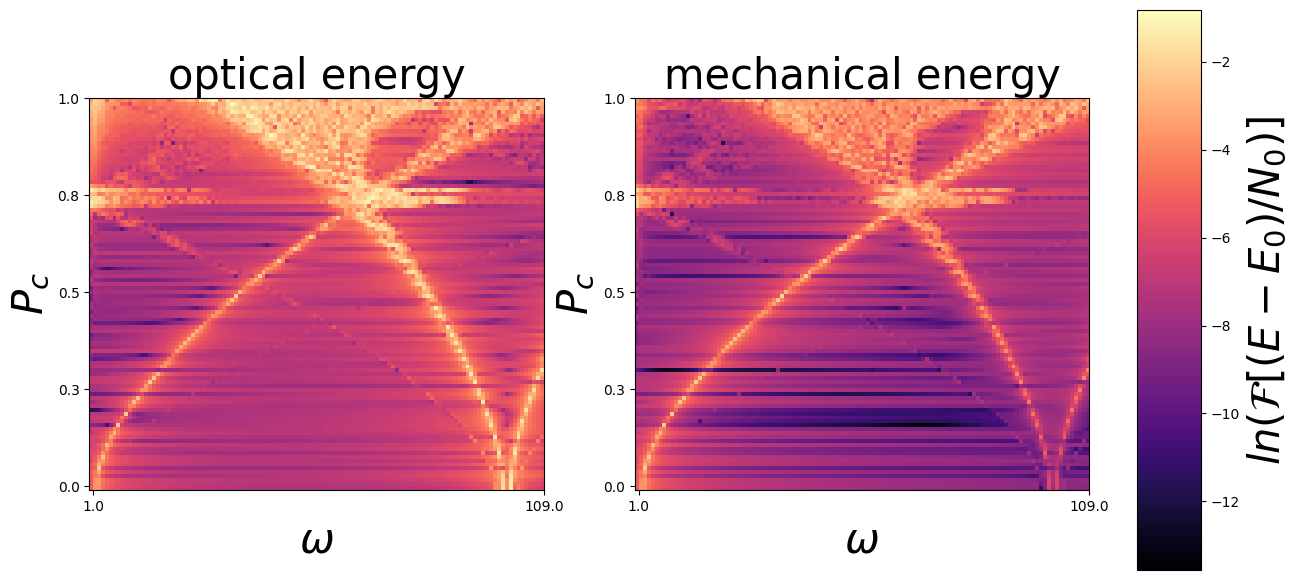

In [18]:
tf=2e1
omega_list=2*np.pi*np.arange(350)/tf
N_step=10000
N_grid=100
P_c_list=np.linspace(0.01,1,N_grid) ############### CRITICAL parameter
g_y=1e-1
qy_0=1e2
N0_list=(np.array(P_c_list)*del_omega)**3/(8*g_y**2)
# print("N0=",N0_list)
title='$g_y={0}\Omega  \: ; \: N_0={1} \: ; \: P_c={2}$'.format(g_y,N0,P_c)
fig, axs = plt.subplots(1, 2,figsize=(16,8))

sf,ef,stp=2,350,3
omega_list=(2*np.pi*np.arange(N_step//2+1)/tf)[sf:ef:stp]

E_mech_mat=np.zeros((len(P_c_list),(ef-sf)//stp))
E_opt_mat=np.zeros((len(P_c_list),(ef-sf)//stp))

for k,P_c in enumerate(P_c_list):
    if P_c<=1:
        tt="stable"
    else:
        tt="chaotic"
    file="real_"+tt+"_P_c={0}_g_y={1}_tf={2}_qy_0={3}".format(np.round(P_c,4),g_y,tf,np.round(qy_0,4))
    data = np.load(folder+file+".npz")
    sol=data['sol']
    t=data['t']
    g_z1,g_y,del_omega,N0=data['param']
    N_step=len(t)
    x1=sol[8]+sol[9]
    x2=sol[10]+sol[11]
    E_opt=(x1-x1[0])/N0
    E_mech=(x2-x2[0])/N0

    label_list=["$E_{opt}$","$E_{mech}$"]
    E_opt_mat[k]=np.log(np.abs(np.fft.rfft(E_opt))[sf:ef:stp]/N_step)
    E_mech_mat[k]=np.log(np.abs(np.fft.rfft(E_mech))[sf:ef:stp]/N_step)
    
E_fft=[E_opt_mat,E_mech_mat]

# find minimum of minima & maximum of maxima
minmin = np.min([np.min(E_mech_mat), np.min(E_opt_mat)])
maxmax = np.max([np.max(E_mech_mat), np.max(E_opt_mat)])
im1=axs[0].imshow(E_opt_mat,vmin=minmin,vmax=maxmax,cmap='magma',origin='lower',interpolation='none')
im2=axs[1].imshow(E_mech_mat,vmin=minmin,vmax=maxmax,cmap='magma',origin='lower',interpolation='none')
axs[0].set_title("optical energy",fontsize=30)
axs[1].set_title("mechanical energy",fontsize=30)
ly=E_fft[0].shape[0]//20
lx=E_fft[0].shape[1]//40
print(lx,ly,(ef-sf)//lx,(N_grid-1)//ly )
# print(len(omega_list[::(ef-sf)//lx]),len(P_c[::(N_grid-1)//ly]))
for i in range(2):
    axs[i].set_ylabel("$P_c$",fontsize=30)
    axs[i].set_xlabel('$\omega$',fontsize=30)
    axs[i].set_xticks(np.linspace(0,E_fft[i].shape[1]-1,lx) + 0.5, minor=False)
    axs[i].set_yticks(np.linspace(0,E_fft[i].shape[0]-1,ly) + 0.5, minor=False)
    axs[i].set_xticklabels(np.round(np.linspace(omega_list[0],omega_list[-1],lx),0), minor=False)
    axs[i].set_yticklabels(np.round(np.linspace(P_c_list[0],P_c_list[-1],ly),1), minor=False)

fig.subplots_adjust(right=0.75)
cbar_ax = fig.add_axes([0.78, 0.15, 0.04, 0.7])
cbar=fig.colorbar(im1, cax=cbar_ax)
cbar.set_label("$ln(\mathcal{F}[(E-E_0)/N_0)]$",fontsize=30,rotation=90)
# fig.suptitle("$\\lambda={0} \: ; \:  \\nu={1} \: ; \: P_c={2}$".format(np.round(lam,2),np.round(nu,2),P_c),fontsize=30)



plt.show() 

2 5 174 19


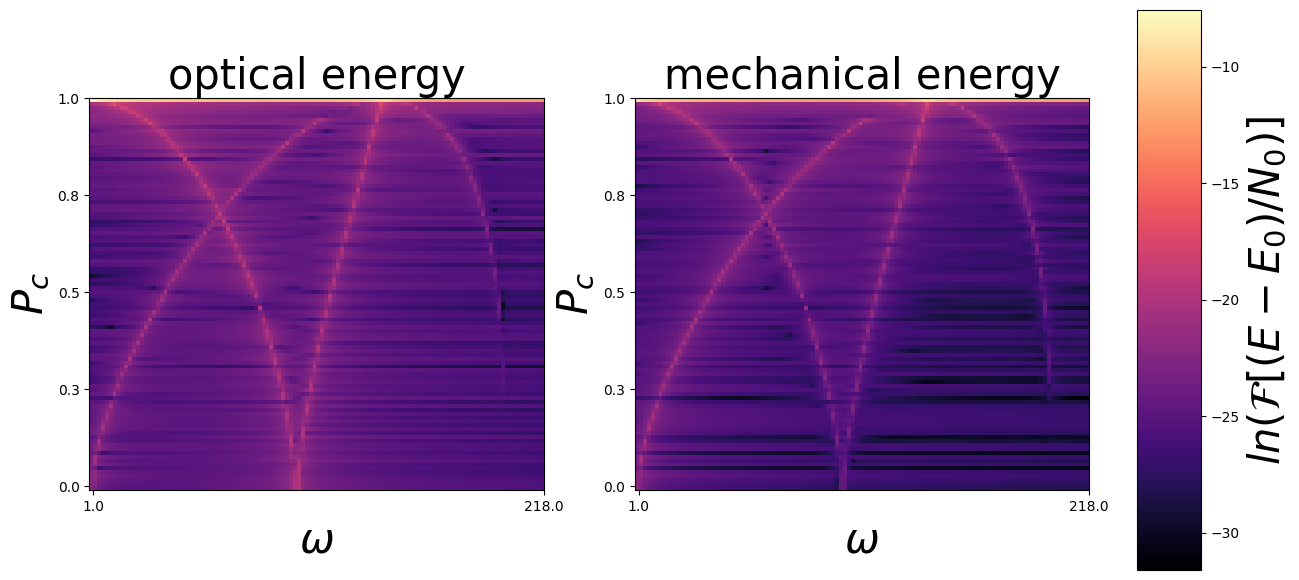

In [212]:
tf=1e1
omega_list=2*np.pi*np.arange(350)/tf
N_step=10000
N_grid=100
P_c_list=np.linspace(0.01,1,N_grid) ############### CRITICAL parameter
g_y=1e-1
N0_list=(np.array(P_c_list)*del_omega)**3/(8*g_y**2)
# print("N0=",N0_list)
title='$g_y={0}\Omega  \: ; \: N_0={1} \: ; \: P_c={2}$'.format(g_y,N0,P_c)
fig, axs = plt.subplots(1, 2,figsize=(16,8))

sf,ef,stp=2,350,3
omega_list=(2*np.pi*np.arange(N_step//2+1)/tf)[sf:ef:stp]

E_mech_mat=np.zeros((len(P_c_list),(ef-sf)//stp))
E_opt_mat=np.zeros((len(P_c_list),(ef-sf)//stp))

for k,P_c in enumerate(P_c_list):
    file="real_stable_P_c={0}_g_y={1}_tf={2}_sep_energy".format(np.round(P_c,4),g_y,tf)
    data = np.load(folder+file+".npz")
    sol=data['sol']
    t=data['t']
    g_z1,g_y,del_omega,N0=data['param']
    N_step=len(t)
    x1=sol[8]+sol[9]
    x2=sol[10]+sol[11]
    E_opt=(x1-x1[0])/N0
    E_mech=(x2-x2[0])/N0

    label_list=["$E_{opt}$","$E_{mech}$"]
    E_opt_mat[k]=np.log(np.abs(np.fft.rfft(E_opt))[sf:ef:stp]/N_step)
    E_mech_mat[k]=np.log(np.abs(np.fft.rfft(E_mech))[sf:ef:stp]/N_step)
    
E_fft=[E_opt_mat,E_mech_mat]

# find minimum of minima & maximum of maxima
minmin = np.min([np.min(E_mech_mat), np.min(E_opt_mat)])
maxmax = np.max([np.max(E_mech_mat), np.max(E_opt_mat)])
im1=axs[0].imshow(E_opt_mat,vmin=minmin,vmax=maxmax,cmap='magma',origin='lower',interpolation='none')
im2=axs[1].imshow(E_mech_mat,vmin=minmin,vmax=maxmax,cmap='magma',origin='lower',interpolation='none')
axs[0].set_title("optical energy",fontsize=30)
axs[1].set_title("mechanical energy",fontsize=30)
ly=E_fft[0].shape[0]//20
lx=E_fft[0].shape[1]//40
print(lx,ly,(ef-sf)//lx,(N_grid-1)//ly )
# print(len(omega_list[::(ef-sf)//lx]),len(P_c[::(N_grid-1)//ly]))
for i in range(2):
    axs[i].set_ylabel("$P_c$",fontsize=30)
    axs[i].set_xlabel('$\omega$',fontsize=30)
    axs[i].set_xticks(np.linspace(0,E_fft[i].shape[1]-1,lx) + 0.5, minor=False)
    axs[i].set_yticks(np.linspace(0,E_fft[i].shape[0]-1,ly) + 0.5, minor=False)
    axs[i].set_xticklabels(np.round(np.linspace(omega_list[0],omega_list[-1],lx),0), minor=False)
    axs[i].set_yticklabels(np.round(np.linspace(P_c_list[0],P_c_list[-1],ly),1), minor=False)

fig.subplots_adjust(right=0.75)
cbar_ax = fig.add_axes([0.78, 0.15, 0.04, 0.7])
cbar=fig.colorbar(im1, cax=cbar_ax)
cbar.set_label("$ln(\mathcal{F}[(E-E_0)/N_0)]$",fontsize=30,rotation=90)
# fig.suptitle("$\\lambda={0} \: ; \:  \\nu={1} \: ; \: P_c={2}$".format(np.round(lam,2),np.round(nu,2),P_c),fontsize=30)



plt.show() 

['$Q_z$' '$P_z$' '$Q_y$' '$P_y$' '$\\delta A_0^+$' '$\\delta A_0^-$'
 '$A_1^+$' '$A_1^-$' '$E_{opt}$' '$E_{mech}$' '$E_{c}$']
6 6 23 19


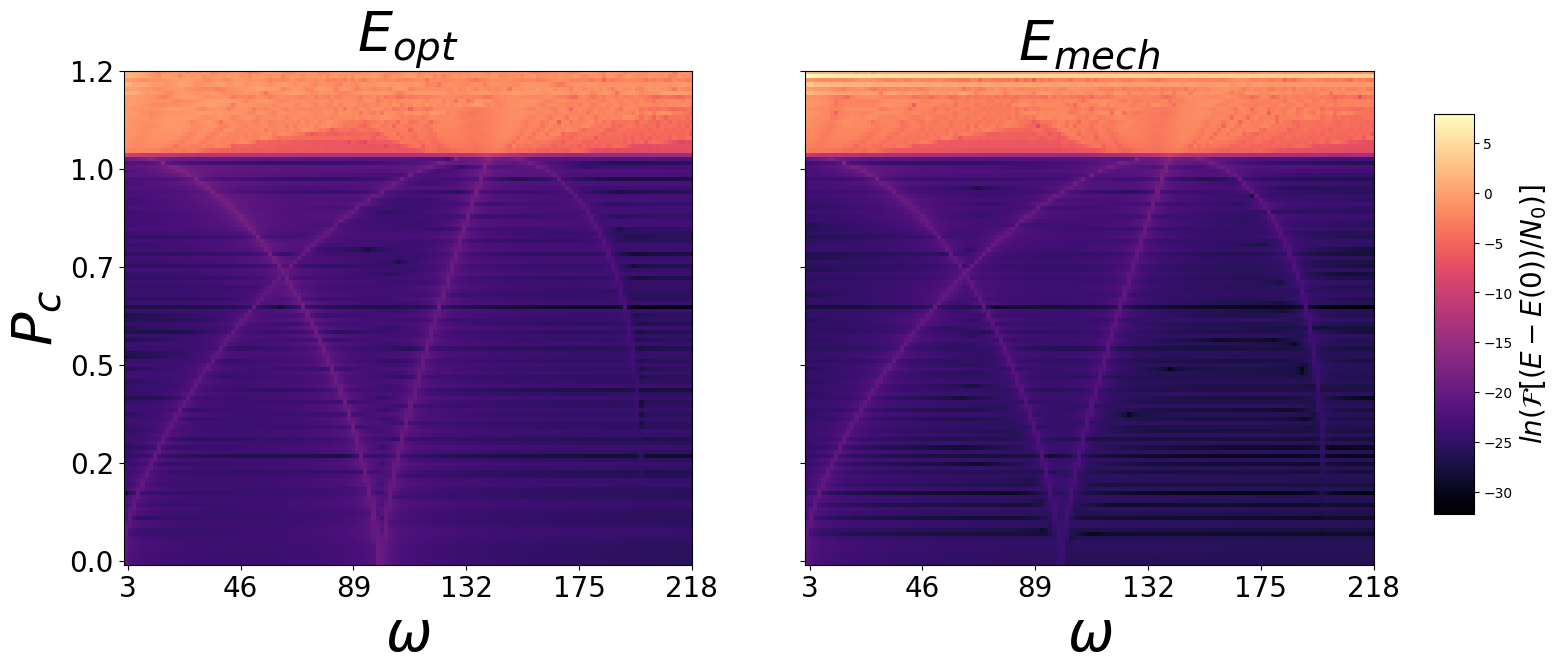

In [310]:
tf=4e0
omega_list=2*np.pi*np.arange(350)/tf
N_step=10000
N_grid=120
P_c_list=np.linspace(0.01,1.2,N_grid) ############### CRITICAL parameter
g_y=1e-1
N0_list=(np.array(P_c_list)*del_omega)**3/(8*g_y**2)
# print("N0=",N0_list)
title='$g_y={0}\Omega  \: ; \: N_0={1} \: ; \: P_c={2}$'.format(g_y,N0,P_c)
fig, axs = plt.subplots(1, 2,figsize=(20,8),sharey=True)

sf,ef=2,140
omega_list=(2*np.pi*np.arange(N_step//2+1)/tf)[sf:ef]

E_mech_mat=np.zeros((len(P_c_list),ef-sf))
E_opt_mat=np.zeros((len(P_c_list),ef-sf))

for k,P_c in enumerate(P_c_list):
    file="real_stable_P_c={0}_g_y={1}_tf={2}".format(np.round(P_c,4),g_y,tf)
    data = np.load(folder+file+".npz")
    sol=data['sol']
    t=data['t']
    g_z1,g_y,del_omega,N0=data['param']
    if k==0: print(data["label"])
    N_step=len(t)
#     x1=sol[8]+sol[9]
#     x2=sol[10]+sol[11]
    x1,x2=sol[8],sol[9]
    E_opt=(x1-x1[0])/N0
    E_mech=(x2-x2[0])/N0

    label_list=["$E_{opt}$","$E_{mech}$"]
    E_opt_mat[k]=np.log(np.abs(np.fft.rfft(E_opt))[sf:ef]/N_step)
    E_mech_mat[k]=np.log(np.abs(np.fft.rfft(E_mech))[sf:ef]/N_step)
    
E_fft=[E_opt_mat,E_mech_mat]

# find minimum of minima & maximum of maxima
minmin = np.min([np.min(E_mech_mat), np.min(E_opt_mat)])
maxmax = np.max([np.max(E_mech_mat), np.max(E_opt_mat)])
im1=axs[0].imshow(E_opt_mat,vmin=minmin,vmax=maxmax,cmap='magma',origin='lower',interpolation='none')
im2=axs[1].imshow(E_mech_mat,vmin=minmin,vmax=maxmax,cmap='magma',origin='lower',interpolation='none')
axs[0].set_title("$E_{opt}$",fontsize=40)
axs[1].set_title("$E_{mech}$",fontsize=40)
ly=E_fft[0].shape[0]//20
lx=E_fft[0].shape[1]//20
print(lx,ly,(ef-sf)//lx,(N_grid-1)//ly )
# print(len(omega_list[::(ef-sf)//lx]),len(P_c[::(N_grid-1)//ly]))
for i in range(2):
    axs[i].set_xlabel('$\omega$',fontsize=40)
    axs[i].set_xticks(np.linspace(0,E_fft[i].shape[1]-1,lx) + 0.5, minor=False)
    axs[i].set_yticks(np.linspace(0,E_fft[i].shape[0]-1,ly) + 0.5, minor=False)
    axs[i].set_xticklabels(np.round(np.linspace(omega_list[0],omega_list[-1],lx,dtype=int)), minor=False,fontsize=20)
    axs[i].set_yticklabels(np.round(np.linspace(P_c_list[0],P_c_list[-1],ly),1), minor=False,fontsize=20)

axs[0].set_ylabel("$P_c$",fontsize=40)

fig.subplots_adjust(right=0.75)
cbar_ax = fig.add_axes([0.78, 0.25, 0.02, 0.5])
cbar=fig.colorbar(im1, cax=cbar_ax)
cbar.set_label("$ln(\mathcal{F}[(E-E(0))/N_0)]$",fontsize=20,rotation=90)
# fig.suptitle("$\\lambda={0} \: ; \:  \\nu={1} \: ; \: P_c={2}$".format(np.round(lam,2),np.round(nu,2),P_c),fontsize=30)
plt.savefig("dispersion_relation_g_y={0}.jpeg".format(g_y),dpi=300)
plt.show() 

4 5 24 22


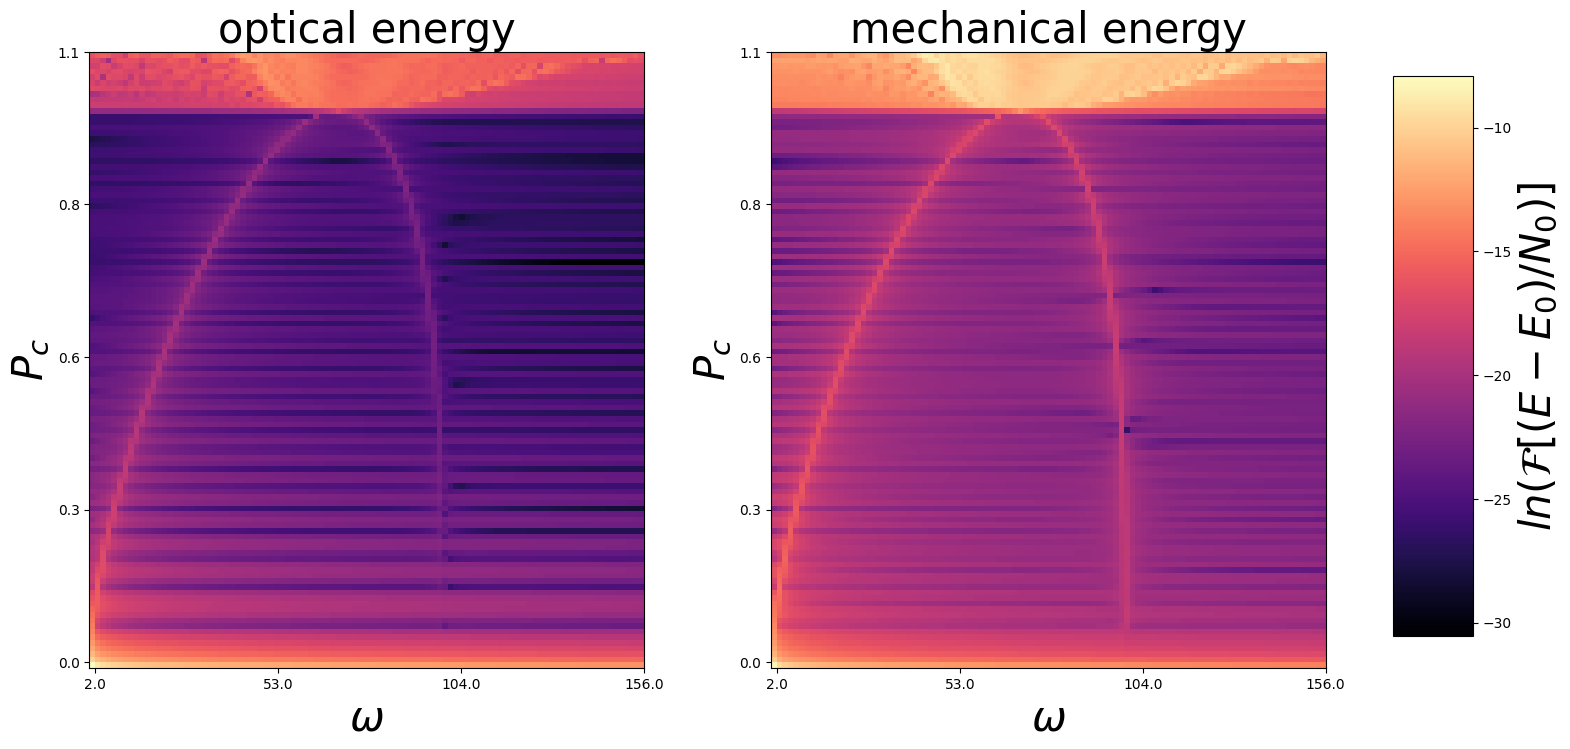

In [216]:
tf=4e0
omega_list=2*np.pi*np.arange(350)/tf
N_step=10000
N_grid=111
P_c_list=np.linspace(0,1.1,N_grid)[1:] ############### CRITICAL parameter
g_y=1e-1
N0_list=(np.array(P_c_list)*del_omega)**3/(8*g_y**2)
# print("N0=",N0_list)
title='$g_y={0}\Omega  \: ; \: N_0={1} \: ; \: P_c={2}$'.format(g_y,N0,P_c)
fig, axs = plt.subplots(1, 2,figsize=(20,8))

sf,ef=1,100
omega_list=(2*np.pi*np.arange(N_step//2+1)/tf)[sf:ef]

E_mech_mat=np.zeros((len(P_c_list),ef-sf))
E_opt_mat=np.zeros((len(P_c_list),ef-sf))

for k,P_c in enumerate(P_c_list):
    file="real_stable_P_c={0}_g_y={1}_tf={2}".format(np.round(P_c,4),g_y,tf)
    data = np.load(folder+file+".npz")
    sol=data['sol']
    t=data['t']
    g_z1,g_y,del_omega,N0=data['param']
    N_step=len(t)
    x1=sol[2]
    x2=sol[3]
    E_opt=(x1-x1[0])/N0
    E_mech=(x2-x2[0])/N0

    label_list=["$E_{opt}$","$E_{mech}$"]
    E_opt_mat[k]=np.log(np.abs(np.fft.rfft(E_opt))[sf:ef]/N_step)
    E_mech_mat[k]=np.log(np.abs(np.fft.rfft(E_mech))[sf:ef]/N_step)
    
E_fft=[E_opt_mat,E_mech_mat]

# find minimum of minima & maximum of maxima
minmin = np.min([np.min(E_mech_mat), np.min(E_opt_mat)])
maxmax = np.max([np.max(E_mech_mat), np.max(E_opt_mat)])
im1=axs[0].imshow(E_opt_mat,vmin=minmin,vmax=maxmax,cmap='magma',origin='lower',interpolation='none')
im2=axs[1].imshow(E_mech_mat,vmin=minmin,vmax=maxmax,cmap='magma',origin='lower',interpolation='none')
axs[0].set_title("optical energy",fontsize=30)
axs[1].set_title("mechanical energy",fontsize=30)
ly=E_fft[0].shape[0]//20
lx=E_fft[0].shape[1]//20
print(lx,ly,(ef-sf)//lx,(N_grid-1)//ly )
# print(len(omega_list[::(ef-sf)//lx]),len(P_c[::(N_grid-1)//ly]))
for i in range(2):
    axs[i].set_ylabel("$P_c$",fontsize=30)
    axs[i].set_xlabel('$\omega$',fontsize=30)
    axs[i].set_xticks(np.linspace(0,E_fft[i].shape[1]-1,lx) + 0.5, minor=False)
    axs[i].set_yticks(np.linspace(0,E_fft[i].shape[0]-1,ly) + 0.5, minor=False)
    axs[i].set_xticklabels(np.round(np.linspace(omega_list[0],omega_list[-1],lx),0), minor=False)
    axs[i].set_yticklabels(np.round(np.linspace(P_c_list[0],P_c_list[-1],ly),1), minor=False)

fig.subplots_adjust(right=0.75)
cbar_ax = fig.add_axes([0.78, 0.15, 0.04, 0.7])
cbar=fig.colorbar(im1, cax=cbar_ax)
cbar.set_label("$ln(\mathcal{F}[(E-E_0)/N_0)]$",fontsize=30,rotation=90)
# fig.suptitle("$\\lambda={0} \: ; \:  \\nu={1} \: ; \: P_c={2}$".format(np.round(lam,2),np.round(nu,2),P_c),fontsize=30)



plt.show() 

In [133]:
E_fft[0].shape

(110, 99)

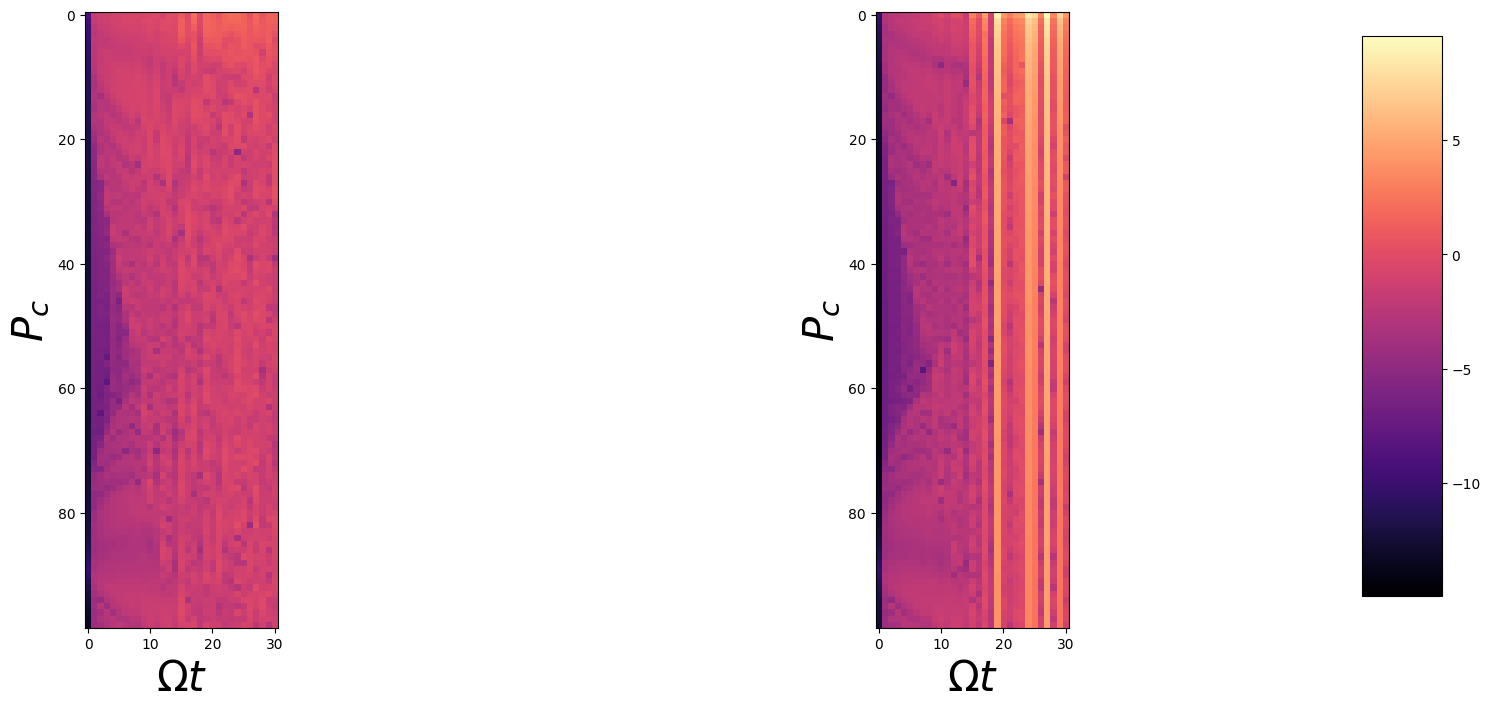

In [110]:
tf=4e0
omega_list=2*np.pi*np.arange(350)/tf
N_step=10000
N_grid=31
P_c_list=np.linspace(1,1.3,N_grid)
g_y=1e-1
N0_list=(np.array(P_c_list)*del_omega)**3/(8*g_y**2)
# print("N0=",N0_list)
title='$g_y={0}\Omega  \: ; \: N_0={1} \: ; \: P_c={2}$'.format(g_y,N0,P_c)
fig, axs = plt.subplots(1, 2,figsize=(20,8))

sf,ef=1,100
omega_list=(2*np.pi*np.arange(N_step//2+1)/tf)[sf:ef]

E_mech_mat=np.zeros((ef-sf,len(P_c_list)))
E_opt_mat=np.zeros((ef-sf,len(P_c_list)))

for k,P_c in enumerate(P_c_list):
    file="real_stable_P_c={0}_g_y={1}_tf={2}".format(np.round(P_c,4),g_y,tf)
    data = np.load(folder+file+".npz")
    sol=data['sol']
    t=data['t']
    g_z1,g_y,del_omega,N0=data['param']
    N_step=len(t)
    E_opt=(sol[8]-sol[8][0])/N0
    E_mech=(sol[9]-sol[9][0])/N0

    label_list=["$E_{opt}$","$E_{mech}$"]
    E_opt_mat[:,k]=np.log(np.abs(np.fft.rfft(E_opt))[sf:ef]/N_step)
    E_mech_mat[:,k]=np.log(np.abs(np.fft.rfft(E_mech))[sf:ef]/N_step)



# find minimum of minima & maximum of maxima
minmin = np.min([np.min(E_mech_mat), np.min(E_opt_mat)])
maxmax = np.max([np.max(E_mech_mat), np.max(E_opt_mat)])
im1=axs[0].imshow(E_opt_mat,vmin=minmin,vmax=maxmax,cmap='magma')
im2=axs[1].imshow(E_mech_mat,vmin=minmin,vmax=maxmax,cmap='magma')

for i in range(2):
    axs[i].set_ylabel("$P_c$",fontsize=30)
    axs[i].set_xlabel('$\Omega  t$',fontsize=30)
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.15, 0.04, 0.7])
fig.colorbar(im1, cax=cbar_ax)
# fig.suptitle("$\\lambda={0} \: ; \:  \\nu={1} \: ; \: P_c={2}$".format(np.round(lam,2),np.round(nu,2),P_c),fontsize=30)
plt.show() 

N0= [16637500. 21600000.]


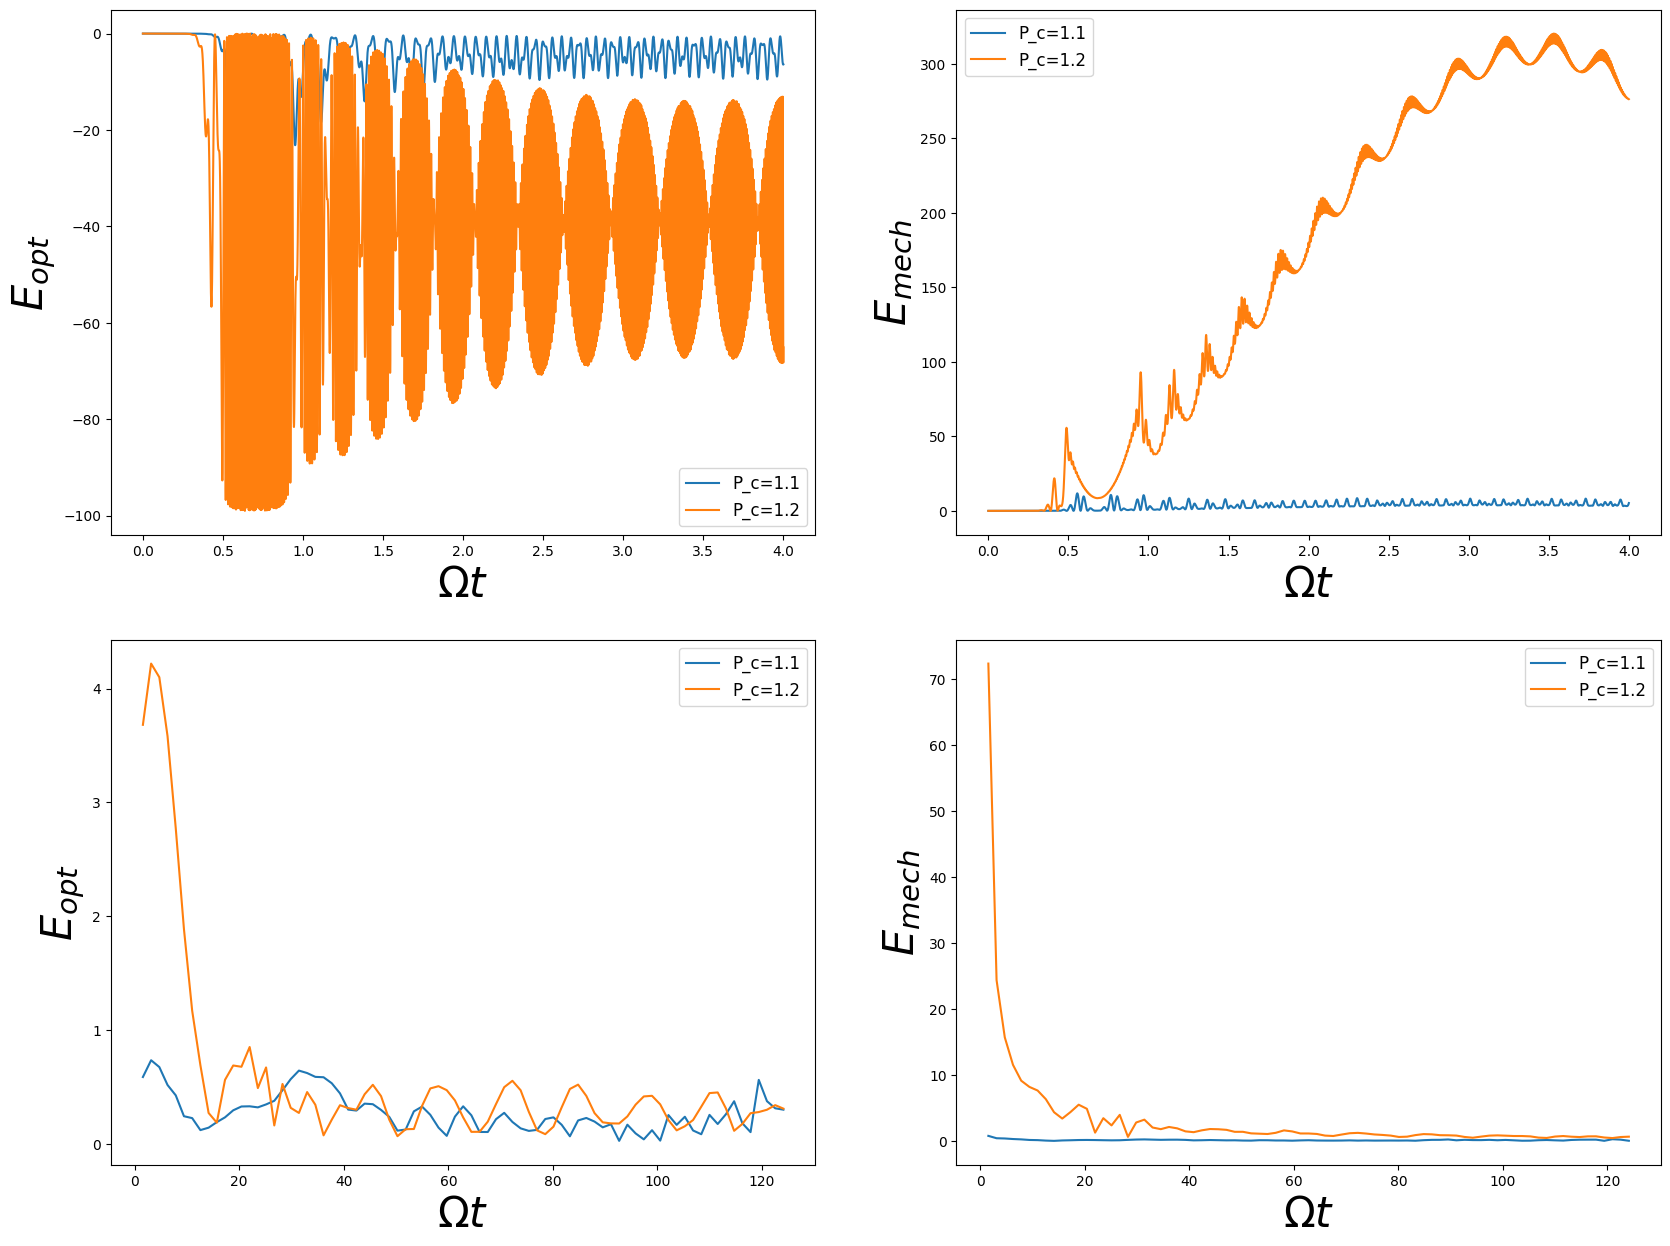

In [183]:
tf=4e0
omega_list=2*np.pi*np.arange(350)/tf

P_c_list=[1.1,1.2] ############### CRITICAL parameter
g_y=1e-1
N0_list=(np.array(P_c_list)*del_omega)**3/(8*g_y**2)
print("N0=",N0_list)
title='$g_y={0}\Omega  \: ; \: N_0={1} \: ; \: P_c={2}$'.format(g_y,N0,P_c)
fig, axs = plt.subplots(2, 2,figsize=(20,15))

sf,ef=1,80
for k,P_c in enumerate(P_c_list):
    file="real_stable_P_c={0}_g_y={1}_tf={2}".format(P_c,g_y,tf)
    data = np.load(folder+file+".npz")
    sol=data['sol']
    t=data['t']
    g_z1,g_y,del_omega,N0=data['param']
    N_step=len(t)
    E_opt=(sol[8]-sol[8][0])/N0
    E_mech=(sol[9]-sol[9][0])/N0

    E=[E_opt,E_mech]
    label_list=["$E_{opt}$","$E_{mech}$"]
    omega_list=(2*np.pi*np.arange(L//2+1)/tf)[sf:ef]

    for i in range(2):
        axs[0,i].plot(t,E[i][:len(t)],label="P_c={0}".format(P_c))
        axs[1,i].plot(omega_list,np.abs(np.fft.rfft(E[i]))[sf:ef]/N_step,label="P_c={0}".format(P_c))


for i in range(2):
    axs[0,i].set_ylabel(label_list[i],fontsize=30)
    axs[0,i].set_xlabel('$\Omega  t$',fontsize=30)
    axs[0,i].legend(fontsize=12)
    axs[1,i].set_ylabel(label_list[i],fontsize=30)
    axs[1,i].set_xlabel('$\Omega  t$',fontsize=30)
    axs[1,i].legend(fontsize=12)

    # fig.suptitle("$\\lambda={0} \: ; \:  \\nu={1} \: ; \: P_c={2}$".format(np.round(lam,2),np.round(nu,2),P_c),fontsize=30)
plt.show() 

In [ ]:
tf=4e0
omega_list=2*np.pi*np.arange(350)/tf

P_c_list=[0.2,0.1] ############### CRITICAL parameter
g_y=1e-1
N0_list=(np.array(P_c_list)*del_omega)**3/(8*g_y**2)
print("N0=",N0_list)
title='$g_y={0}\Omega  \: ; \: N_0={1} \: ; \: P_c={2}$'.format(g_y,N0,P_c)
fig, axs = plt.subplots(2, 2,figsize=(20,15))

sf,ef=1,100
for k,P_c in enumerate(P_c_list):
    file="real_stable_P_c={0}_g_y={1}_tf={2}".format(P_c,g_y,tf)
    data = np.load(folder+file+".npz")
    sol=data['sol']
    t=data['t']
    g_z1,g_y,del_omega,N0=data['param']
    N_step=len(t)
    E_opt=(sol[8]-sol[8][0])/N0
    E_mech=(sol[9]-sol[9][0])/N0

    E=[E_opt,E_mech]
    label_list=["$E_{opt}$","$E_{mech}$"]
    omega_list=(2*np.pi*np.arange(L//2+1)/tf)[sf:ef]

    for i in range(2):
        axs[0,i].plot(t,E[i][:len(t)],label="P_c={0}".format(P_c))
        axs[1,i].plot(omega_list,np.abs(np.fft.rfft(E[i]))[sf:ef]/N_step,label="P_c={0}".format(P_c))


for i in range(2):
    axs[0,i].set_ylabel(label_list[i],fontsize=30)
    axs[0,i].set_xlabel('$\Omega  t$',fontsize=30)
    axs[0,i].legend(fontsize=12)
    axs[1,i].set_ylabel(label_list[i],fontsize=30)
    axs[1,i].set_xlabel('$\Omega  t$',fontsize=30)
    axs[1,i].legend(fontsize=12)

    # fig.suptitle("$\\lambda={0} \: ; \:  \\nu={1} \: ; \: P_c={2}$".format(np.round(lam,2),np.round(nu,2),P_c),fontsize=30)
plt.show() 